# Lead Scoring Case Study #

### Importing libraries and suppressing warnings ###

In [61]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
# supressing warnings
import warnings
warnings.filterwarnings("ignore")

## 1.0  Importing and inspection of the data  ##

In [62]:
# Setting up the display environment for data analysis and visualization
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width',None)

In [63]:
# Read the file Leads.csv and assign a dataframe

df = pd.read_csv(r'C:\Users\ADMIN\Downloads\Leads.csv')
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

# 2.0 Data Inspection #

In [64]:
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [65]:
df.shape

(9240, 37)

In [66]:
# overview of data

df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [67]:
# checking no. of unique values in each column
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [68]:
# Checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Inference #

In [69]:
# There are some NULL values in this dataframe.

In [70]:
# To check for missing values in each column of a dataset 
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

## Inference ## 

In [71]:
# Data Cleaning should be performed to address missing/null values in Data Frame.

## 3.0 Data Cleaning ##

### 3.1 Handling "NULL" and "Select" values

### Replacing 'Select' values with NaN, avoids any potential misinterpretation of the 'Select' values.. ###

In [72]:
# Create List of  columns having 'Select' as option

select_value_column = [col for col in df.columns if len(df[col].isin(['Select']).unique())>1]
print(select_value_column)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [73]:
# Convert 'Select' values to NaN.

df = df.replace('Select', np.nan)

In [74]:
# Check if all 'Select' values have been handled in the columns
select_value_column = [col for col in df.columns if len(df[col].isin(['Select']).unique())>1]
print(select_value_column)

[]


## Inference ##

In [75]:
# Dataframe df has no "Select" values remain after cleaning.

### 3.2 Handling Missing Values

In [76]:
# Missing Values Percentage
100*(df.isna().mean()).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

#### Drop the  Columns with more than 60% Null Values ####

In [45]:
# drop columns


In [86]:
def dropNullvalueColumns(data ,percentage=45):
    
    percentageofmiss = 100*(data.isna().mean()).sort_values(ascending=False)
    columnstodrop = percentageofmiss[ percentageofmiss>=percentage].index.to_list()
    print("Total no of columns dropped: ",len(columnstodrop),"\n")
    print("List of all the columns dropped : " , columnstodrop,"\n")
    print("Shape before dropping the columns: ",data.shape)
    
    data.drop(labels=columnstodrop,axis=1, inplace=True)
    
    print("Shape after dropping the columns: ",data.shape)

In [80]:
# dropping columns using function
dropNullvalueColumns(df) 

Total no of columns dropped:  5 

List of all the columns dropped :  ['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index'] 

Shape before dropping the columns:  (9240, 35)
Shape after dropping the columns:  (9240, 30)


In [81]:
# Checking the percentage of null values in the remaining columns

100*(df.isna().mean()).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

### 3.3 Analyzing columns with Categorical Data

In [82]:
# To avoid plagiarism, identify non-numeric columns in dataframe df for further processing.
categoricalcolumns = df.select_dtypes(include=['category', 'object']).columns.tolist()

# Printing the selected columns
print(categoricalcolumns)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


## Inference ##

In [83]:
# Assess categorical variables' missing value percentages individually and handle them accordingly, considering the unique characteristics of each variable for optimal treatment.

In [89]:
columnsList= ["City","Specialization","Tags",'What matters most to you in choosing a course',
              'What is your current occupation','Country','Last Activity','Lead Source']

for i in columnsList:
        perc=100*df[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("___"*30,"\n")


value_counts % for : City 

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64 

__________________________________________________________________________________________ 

value_counts % for : Specialization 

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Ho

#### Insights ####


- With 39.71% missing values, imputing "City" with Mumbai would introduce bias. Thus, it's preferable to drop this column. 
- Despite 36.58% missing values in "Specialization," they're evenly distributed. Creating an "Others" category is a viable solution, avoiding the need for imputation or dropping.
- "Tags" are indicators of customers' current status, yet with 36.29% missing values, this column lacks modeling utility and can be safely dropped.
- "What matters most in choosing a course" suffers from 29.32% missing values, with 99.95% opting for 'better career prospects', rendering it skewed and uninformative.
- Imputing missing values in "What is your current occupation" with 'Unemployed' seems reasonable given its prevalence and relevance to X Education's business context.
- With 96% of customers from India, imputing missing values with India for "Country" is redundant, warranting the column's removal.
- Imputing "Last Activity" missing values with 'Email Opened' aligns with its high occurrence (1.11% missing) and utility.
- "Google" as the lead source, with just 0.39% missing values, supports imputation with this label for robustness in analysis.



## Columns to be dropped ##
- 'City'
- 'Tags'
- 'What matters most to you in choosing a course'
- 'Country'

In [104]:
# Drop the Columns

print("Before Drop", df.shape)
columns_to_drop = ['City', 'Tags', 'Country', 'What matters most to you in choosing a course']
df.drop(columns_to_drop, axis=1, inplace=True)
print("After Drop", df.shape)



Before Drop (9240, 30)
After Drop (9240, 26)


## Columns requiring imputation"

- 'Specialization'
- 'Lead Source'
- 'Last Activity'
- 'What is your current occupation'

In [105]:
# Imputing values 

void_values={'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}
df=df.fillna(value=void_values)

In [106]:
# Re Checking the percentage of null values in remaining columns

round(((df.isnull().sum()/df.shape[0])*100),2).sort_values(ascending=False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

### 3.4 Columns with Numerical Data

In [107]:
# TotalVisits
print("TotalVisits  -  Value Counts")

df.TotalVisits.value_counts().head(10)

TotalVisits  -  Value Counts


0.0    2326
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

<strong><span style="color:#00c3ff">Inference:</span></strong> Missing values in 'TotalVisits' can be imputed with "mode".

In [108]:
# TotalVisits missing values to be imputed with mode
df['TotalVisits'].fillna(df['TotalVisits'].mode()[0], inplace=True)

In [109]:
# Page Views Per Visit
print("Page Views Per Visit  -  Value Counts")

df.TotalVisits.value_counts().head(10)

Page Views Per Visit  -  Value Counts


0.0    2326
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

<strong><span style="color:#00c3ff">Inference:</span></strong> Missing values in 'Page Views Per Visit' can be imputed with "mode".

In [110]:
# Page Views Per Visit missing values to be imputed with mode

df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].mode()[0], inplace=True)

<strong>Re-checking the null values for columns</strong>

In [111]:
# Re Checking the percentage of null values after handling categorical and numerical columns

round(((df.isnull().sum()/df.shape[0])*100),2).sort_values(ascending=False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

### 3.5 Removing Unwanted Columns

In [112]:
# Last Notable Activity
print("Last Notable Activity")

100*df['Last Notable Activity'].value_counts(normalize=True)

Last Notable Activity


Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64

#### Handling columns with only one unique value 

In [115]:
#checking for columns with one unique value

df.describe(include = 'object')

Prospect ID              Lead Origin  \
count                                   9240                     9240   
unique                                  9240                        5   
top     7927b2df-8bba-4d29-b9a2-b6e0beafe620  Landing Page Submission   
freq                                       1                     4886   

       Lead Source Do Not Email Do Not Call Last Activity Specialization  \
count         9240         9240        9240          9240           9240   
unique          21            2           2            17             19   
top         Google           No          No  Email Opened         Others   
freq          2904         8506        9238          3540           3380   

       What is your current occupation Search Magazine Newspaper Article  \
count                             9240   9240     9240              9240   
unique                               6      2        1                 2   
top                         Unemployed     No       No                No   
freq                              8290   9226     9240              9238   

       X Education Forums Newspaper Digital Advertisement  \
count                9240      9240                  9240   
unique                  2         2                     2   
top                    No        No                    No   
freq                 9239      9239                  9236   

       Through Recommendations Receive More Updates About Our Courses  \
count                     9240                                   9240   
unique                       2                                      1   
top                         No                                     No   
freq                      9233                                   9240   

       Update me on Supply Chain Content Get updates on DM Content  \
count                               9240                      9240   
unique                                 1                         1   
top                                   No                        No   
freq                                9240                      9240   

       I agree to pay the amount through cheque  \
count                                      9240   
unique                                        1   
top                                          No   
freq                                       9240   

       A free copy of Mastering The Interview Last Notable Activity  
count                                    9240                  9240  
unique                                      2                    16  
top                                        No              Modified  
freq                                     6352                  3407

##  Following columns have only one unique value ##

- 'Magazine'
 
- 'Receive More Updates About Our Courses', 


- 'Update me on Supply Chain Content', 

- 'Get updates on DM Content',

- 'I agree to pay the amount through cheque', 



These columns can be dropped, due to response category.


In [118]:
# List and dropping columns with one unique value whose count and frequency are same
columnslist_drop = ['Magazine','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque']

print("Before Dropping Columns",df.shape)
df.drop(columnslist_drop, axis = 1, inplace = True)
print("After Dropping Columns",df.shape)


Before Dropping Columns (9240, 26)
After Dropping Columns (9240, 21)


## Drop columns are not used for modeling ##


 
- 'Prospect ID',
- 'Lead Number',
- 'Last Notable Activity'

In [119]:
# Dropping Columns
print("Before Dropping Columns",df.shape)
df.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)
print("After Dropping Columns",df.shape)

Before Dropping Columns (9240, 21)
After Dropping Columns (9240, 18)


In [120]:
# percent of missing values in each row
100*(df.isna().mean(axis=1)).sort_values(ascending=False).head(10)

0       0.0
6064    0.0
6156    0.0
6157    0.0
6158    0.0
6159    0.0
6160    0.0
6161    0.0
6162    0.0
6163    0.0
dtype: float64

## Inference ## 
- There are no missing values in rows

### 3.6 Checking & Dropping Category Columns that are Skewed to  streamline the dataset and improve the quality of analysis or modeling results. ###

#### Checking skewness in categorical columns

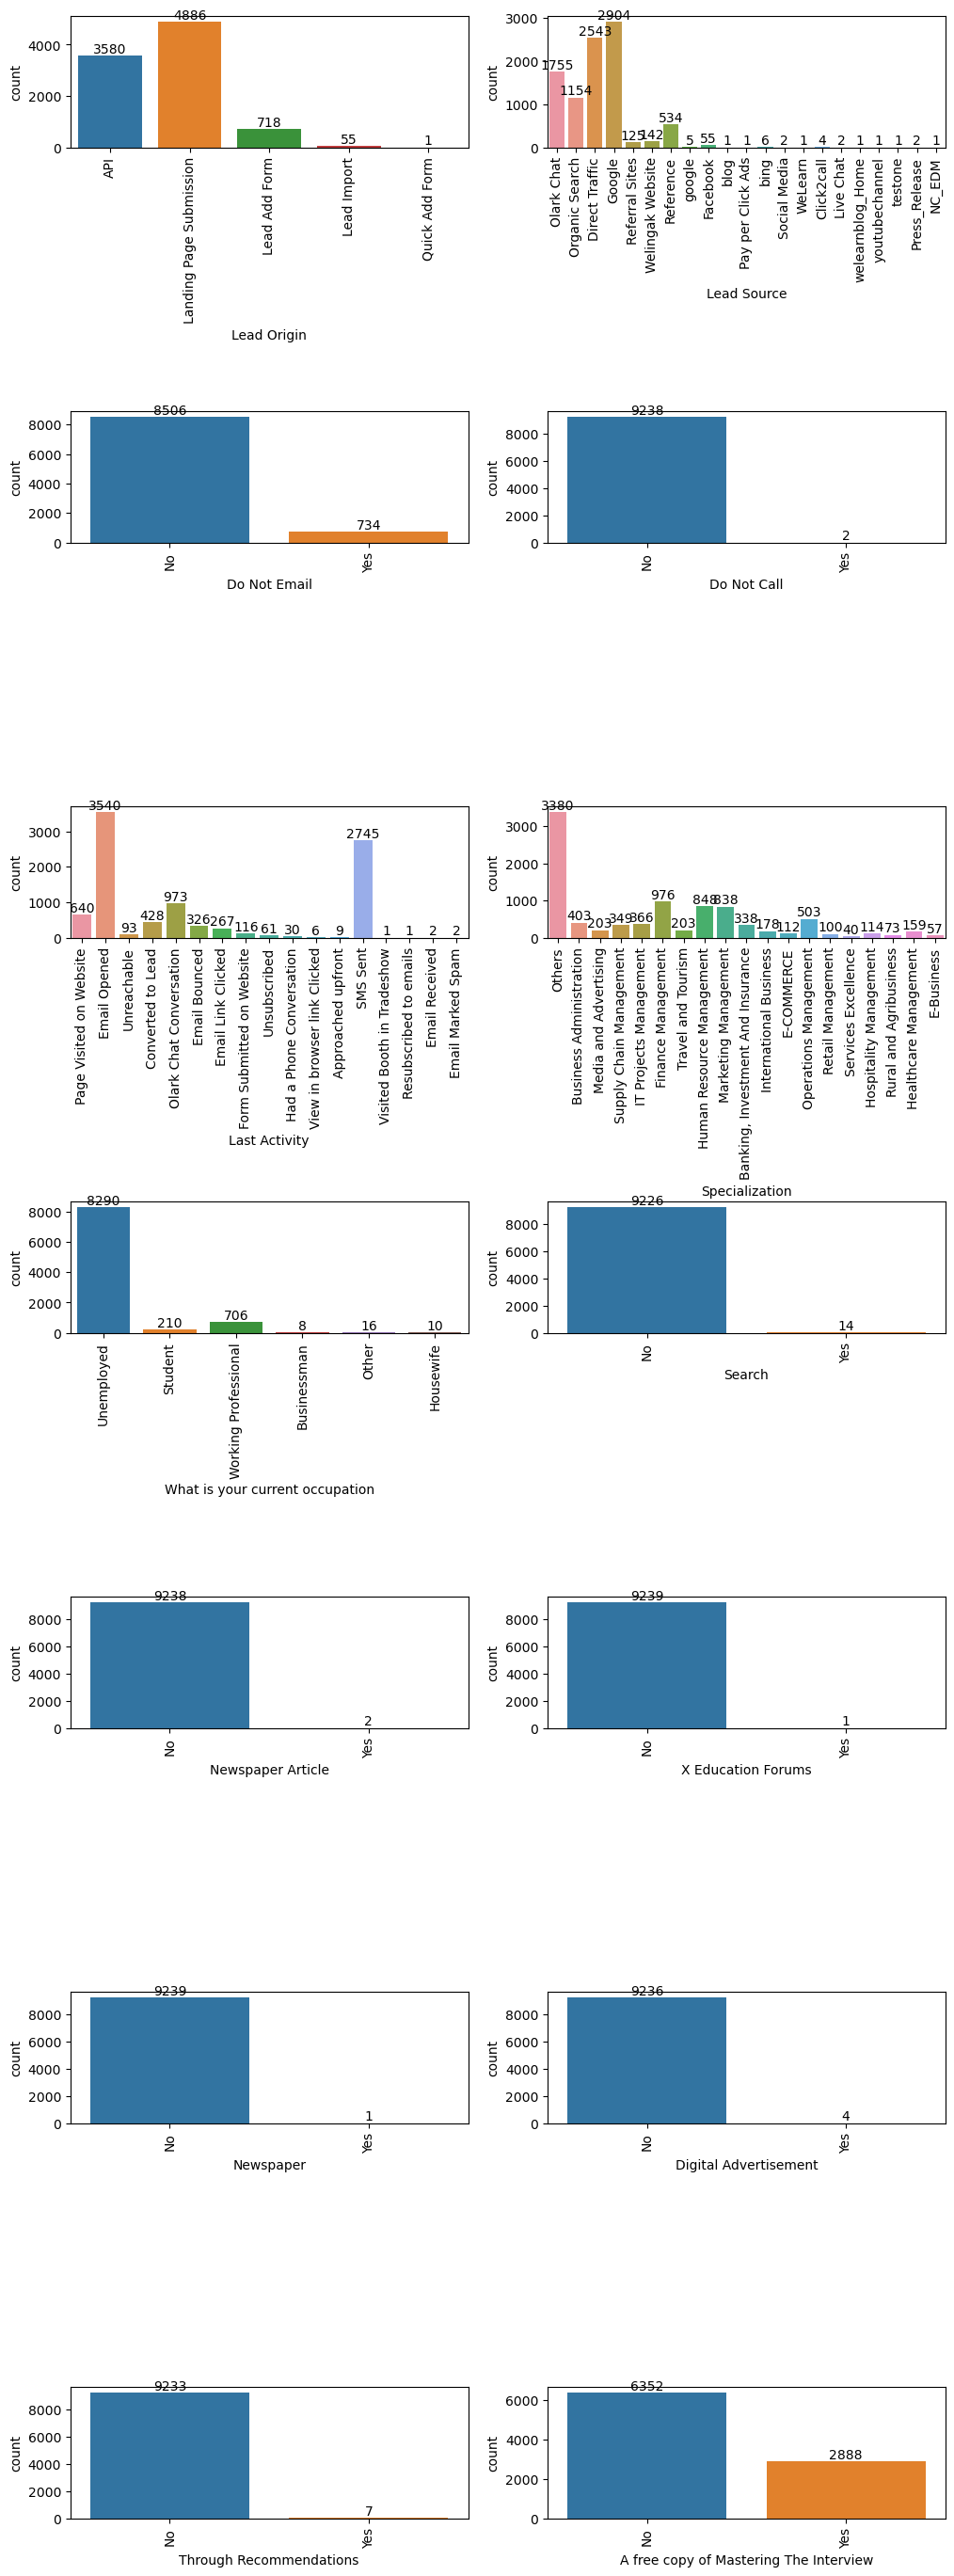

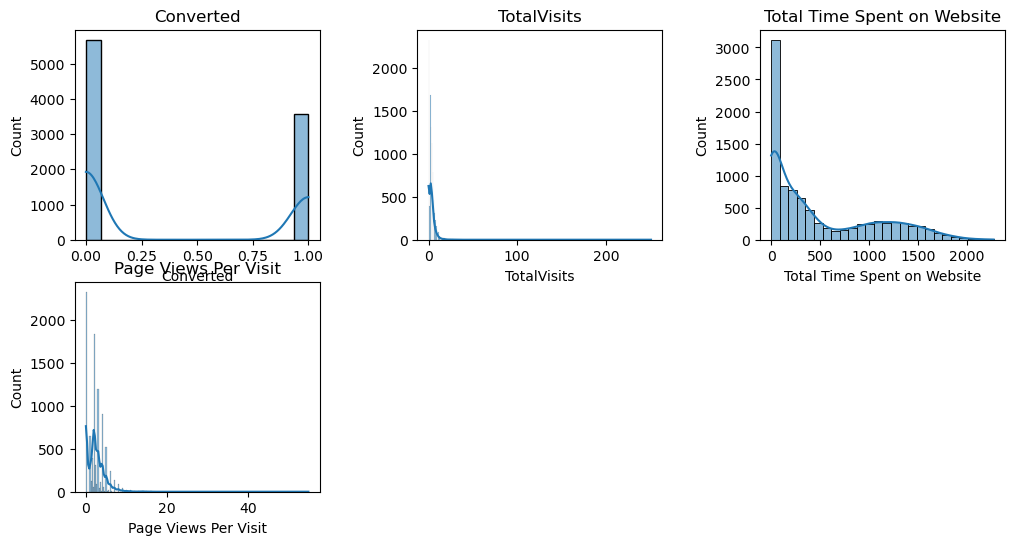

In [122]:

# Selecting categorical and numerical columns
categorical_cols = df.select_dtypes(include=['category', 'object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Plotting countplots for categorical columns
plt.figure(figsize=(12, 40))
plt.subplots_adjust(wspace=.2, hspace=2)

for i, col in enumerate(categorical_cols):
    plt.subplot(8, 2, i + 1)
    ax = sns.countplot(x=col, data=df)
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

# Plotting histograms for numerical columns
plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=.4)

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.show()


## Inference ##
### The following columns have highly skewed data and won't add much value to the model. Hence they can be dropped ###
- 'Do Not Call'
- 'Search'
- 'Newspaper Article'
- 'X Education Forums'
- 'Newspaper' 
- 'Digital Advertisement'
- 'Through Recommendations'

In [123]:
# Dropping categorical columns with highly skewed data

print("Before Drop: ",df.shape)
df.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
print("After Drop: ",df.shape)

Before Drop:  (9240, 18)
After Drop:  (9240, 11)


In [124]:
df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

### 3.7 Outlier Analysis ###

#### For Numerical Columns

In [45]:
# function for checking outliers

In [125]:


def Check_Outliers(data, columnList):
    plt.figure(figsize=[22, 11])
    plt.subplots_adjust(wspace=0.4, hspace=0.5)

    for i, col in enumerate(columnList):
        plt.subplot(2, 2, i + 1)
        sns.boxplot(y=data[col])  # Using y=data[col] to make the plot vertical
        plt.title(col, fontsize=15, color='brown')

    plt.suptitle("\nChecking Outliers using Boxplot", fontsize=20, color="green")
    plt.show()


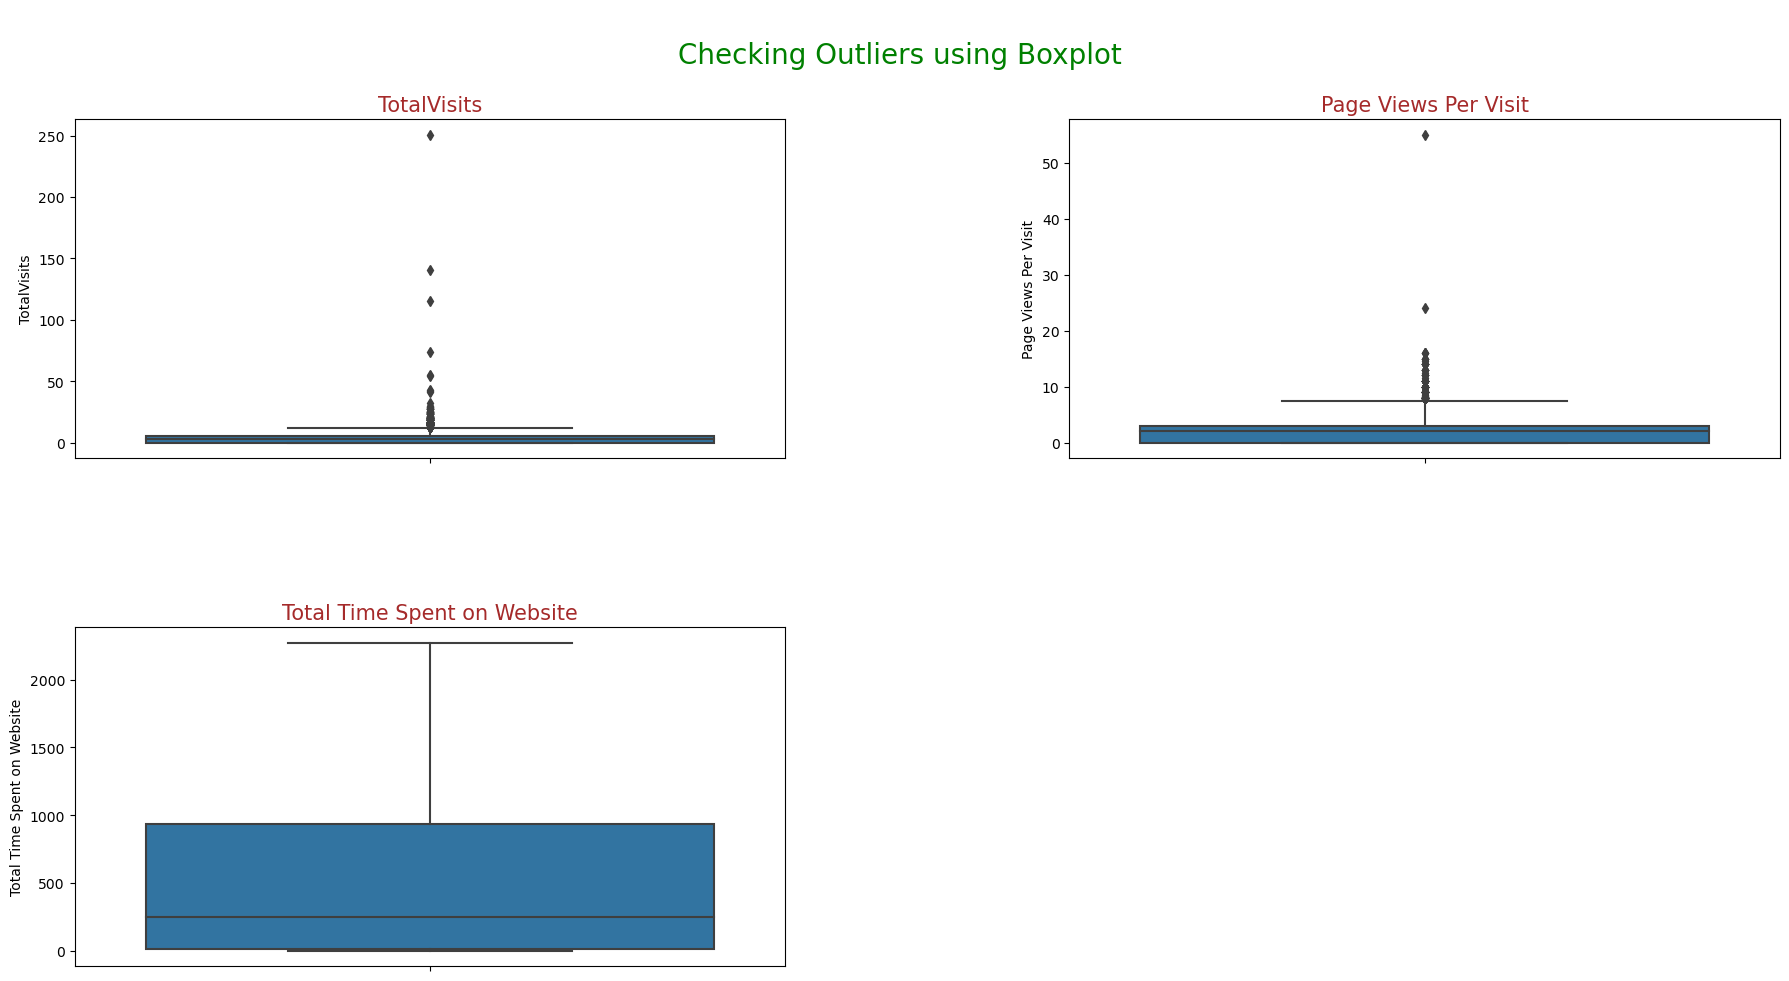

In [126]:
# Checking outliers for numerical variables other than target variable using UDF
numericalvarcol = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"] 
Check_Outliers(df,numericalvarcol)

## Inference ##

- The attributes "TotalVisits" and "Page Views Per Visit" exhibit outliers and require remediation.

#### Treating outliers using capping method

In [127]:
# Before capping treatment
df.describe(percentiles=[.10,.25,.50,.75,.95])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.394156                   487.698268   
std       0.486714     4.836682                   548.021466   
min       0.000000     0.000000                     0.000000   
10%       0.000000     0.000000                     0.000000   
25%       0.000000     0.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
95%       1.000000    10.000000                  1562.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.327787  
std                2.164258  
min                0.000000  
10%                0.000000  
25%                0.000000  
50%                2.000000  
75%                3.000000  
95%                6.000000  
max               55.000000

In [48]:
# User-defined function to treat outliers using capping and flooring

def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])
        
        

In [128]:
# function to treat outliers using capping and flooring

def Outlier_treatment(df, columnList):
    for col in columnList:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        IQR = q3 - q1

        upper_bound = q3 + 1.5 * IQR
        lower_bound = q1 - 1.5 * IQR

        # Capping upper_bound
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

        # Flooring lower_bound
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])



In [129]:
# Checking outliers for numerical variables other than target variable 
cappcols = ["TotalVisits","Page Views Per Visit"]

# UDF 
Outlier_treatment(df,cappcols)

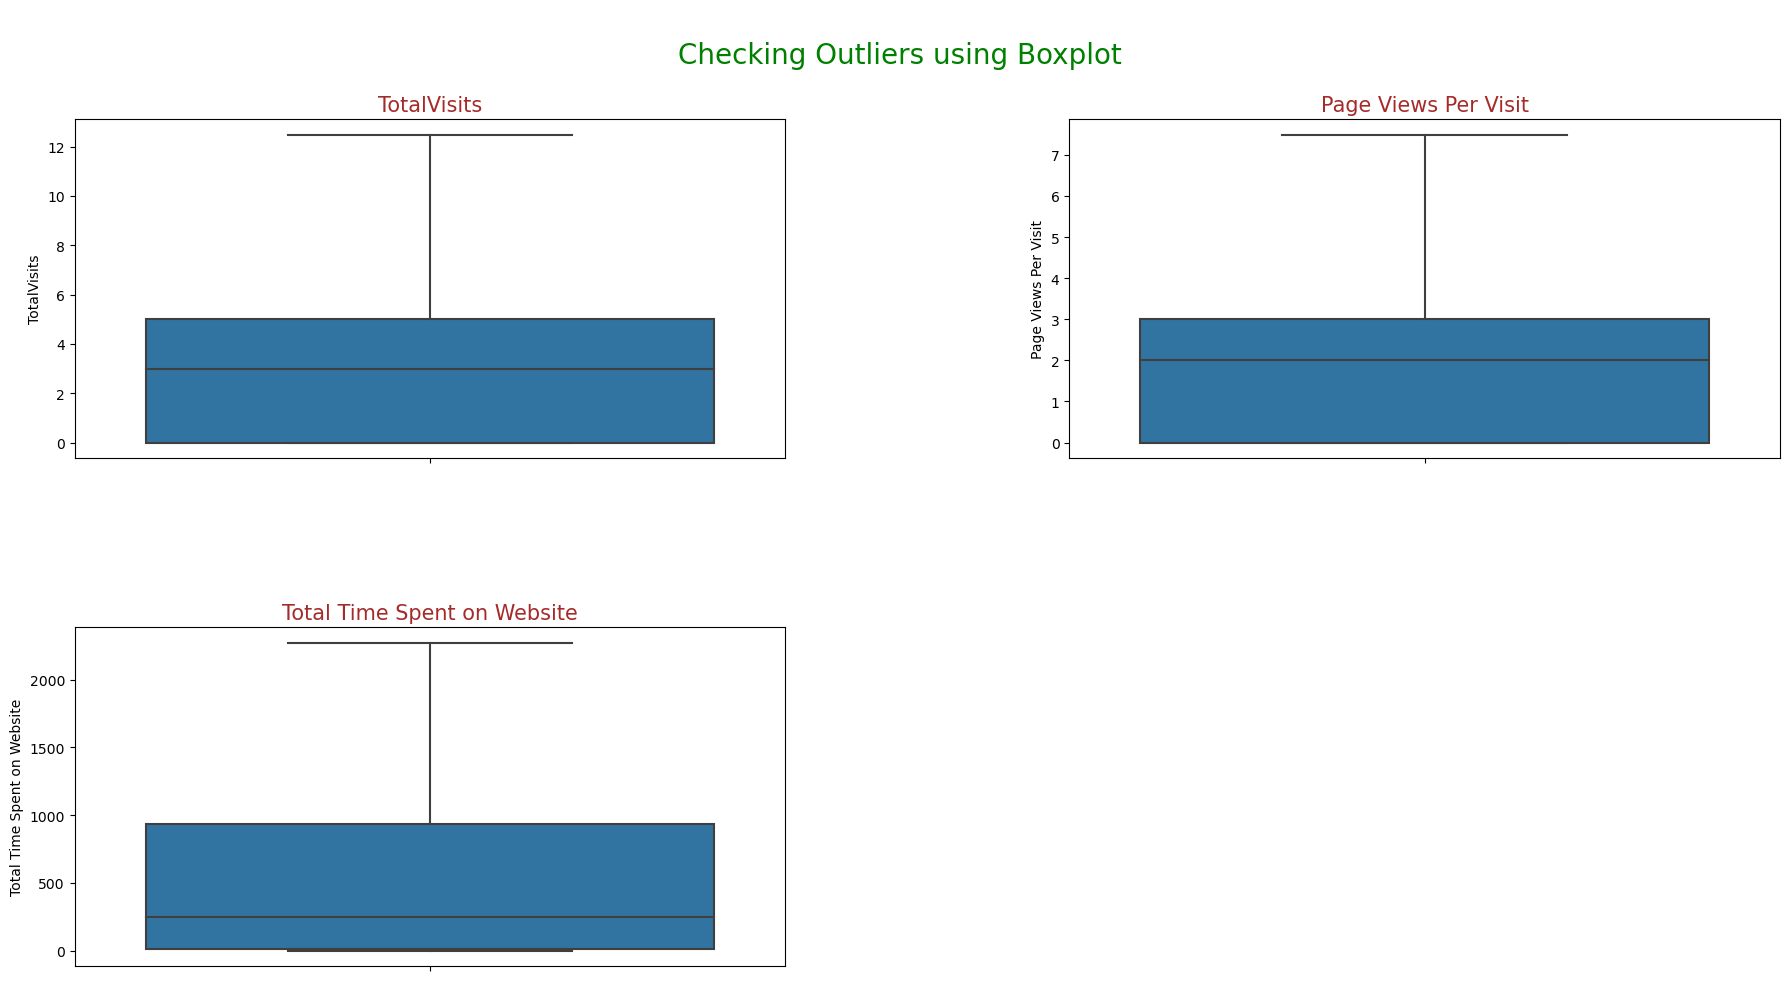

In [130]:
# Boxplot after capping Treatment

numcols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]
Check_Outliers(df,numcols)

In [131]:
# Detailed percentlie values after treatment
df.describe(percentiles=[.10,.25,.50,.75,.95])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.213853                   487.698268   
std       0.486714     3.005136                   548.021466   
min       0.000000     0.000000                     0.000000   
10%       0.000000     0.000000                     0.000000   
25%       0.000000     0.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
95%       1.000000    10.000000                  1562.000000   
max       1.000000    12.500000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.274987  
std                1.917776  
min                0.000000  
10%                0.000000  
25%                0.000000  
50%                2.000000  
75%                3.000000  
95%                6.000000  
max                7.500000

### 3.8 Correcting invalid values and standardizing data within the columns..###

In [132]:
df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

In [134]:
## Checking Categorical Variables 

List_catcolumns = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization",
                  "What is your current occupation","A free copy of Mastering The Interview"]

for i in List_catcolumns:
        perc=100*df[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("_   _"*20,"\n")


value_counts % for : Lead Origin 

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 

_   __   __   __   __   __   __   __   __   __   __   __   __   __   __   __   __   __   __   __   _ 

value_counts % for : Lead Source 

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog             

 ## Inference ## 

- To mitigate potential ambiguity when generating dummy variables, we'll consolidate infrequently occurring categories/levels in the "Lead Score" and "Last Activity" columns under "Others," ensuring a cleaner dataframe.

- In the "Lead Source" column, we'll standardize the case by treating "Google" and "google" as equivalent.

#### Grouping Low frequency values

In [135]:
# Grouping low frequency value levels to Others
df['Lead Source'] = df['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

# Changing google to Google
df['Lead Source'] = df['Lead Source'].replace("google","Google")

In [136]:
# check percentage after replace
df["Lead Source"].value_counts(normalize=True)*100

Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: Lead Source, dtype: float64

In [137]:
# Grouping low frequency value levels to Others 
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [138]:
# value_counts percentage after replace
df['Last Activity'].value_counts(normalize=True)*100

Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: Last Activity, dtype: float64

In [139]:
# Renaming column name to "Free_copy" from "A free copy of Mastering The Interview"
df.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)

# Renaming column name to "Current_occupation" from "What is your current occupation"
df.rename(columns={'What is your current occupation': 'Current_occupation'}, inplace=True)


## Inference ##
- The columns "Do Not Email" and "Free_copy" are both binary categorical columns. Therefore, we'll assign values of 1 and 0 to represent "yes" and "no" respectively.

## Mapping Binary categorical variables  ##

In [140]:
# Mapping binary categorical variables (Yes/No to 1/0) 
df['Do Not Email'] = df['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

df['Free_copy'] = df['Free_copy'].apply(lambda x: 1 if x =='Yes' else 0)

#### Checking Data-types of variables

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Current_occupation           9240 non-null   object 
 10  Free_copy                    9240 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


 ## Inference ##
 - Data is suitable for Exploratory Data Analysis (EDA).

# Exploratory Data Analysis (EDA) #

### 4.1 Assessing the balance of the data to determine if it is skewed or evenly distributed.  ###


- Our focal variable is 'Converted,' indicating whether a previous lead resulted in conversion, represented by 1 for conversion and 0 for non-conversion.

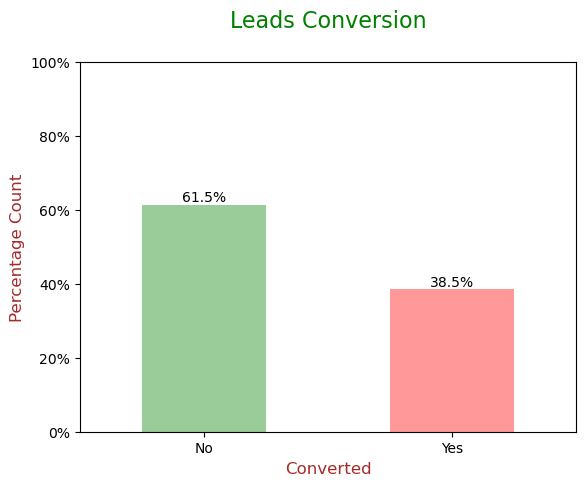

In [142]:


# Calculate percentage of converted leads
converted_percentage = df["Converted"].value_counts(normalize=True) * 100

# Plotting the results on a bar plot
ax = converted_percentage.plot.bar(color=["green", "red"], alpha=0.4)

# Adding and formatting title
plt.title("Leads Conversion\n", fontdict={'fontsize': 16, 'fontweight': 12, 'color': 'green'})

# Labeling Axes
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight': 20, 'color': 'brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight': 20, 'color': 'brown'})

# Modifying ticks on y axis
ticks = range(0, 101, 20)
labels = ["{:.0f}%".format(i) for i in ticks]
plt.yticks(ticks, labels)

# Setting xticks
plt.xticks([0, 1], ["No", "Yes"], rotation=0)

# Adding annotations to the bars
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


## Insights ##
- Conversion rate stands at 38.5%: Merely 38.5% of the leads transitioned from cold to hot.
- The remaining 61.5% did not convert into leads.

In [144]:
### Ratio of Data Imbalance

ratio=(df["Converted"].value_counts(normalize=True).loc[0])/(df["Converted"].value_counts(normalize=True).loc[1])

print("Data Imbalance Ratio : {:.2f} : {}".format(ratio,1))

Data Imbalance Ratio : 1.59 : 1


### 4.2 Univariate Analysis

In [145]:
df.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current_occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

   Free_copy  
0          0  
1          0  
2          1  
3          0  
4          0

#### Categorical Variables

In [146]:
#List of categorical columns
catcolsvar = ["Lead Origin","Current_occupation","Do Not Email",
            "Free_copy","Lead Source","Last Activity","Specialization"]

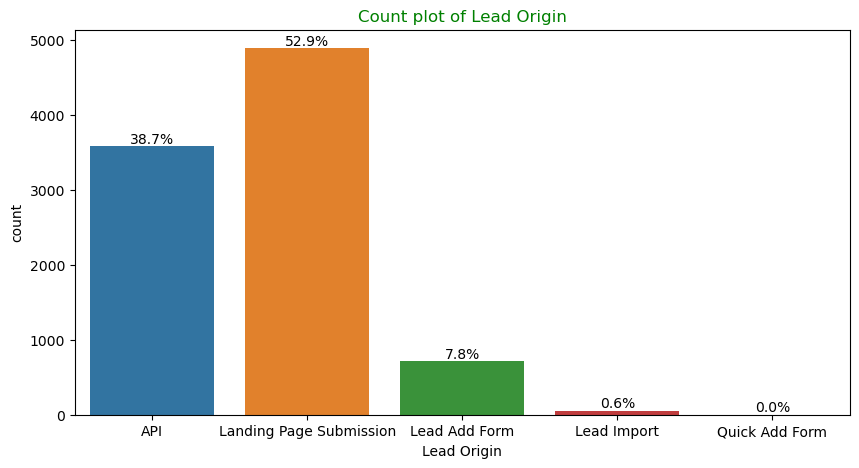

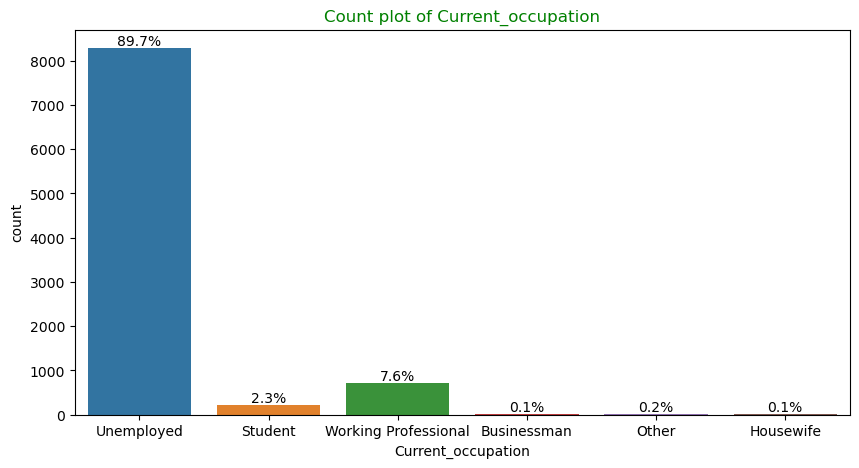

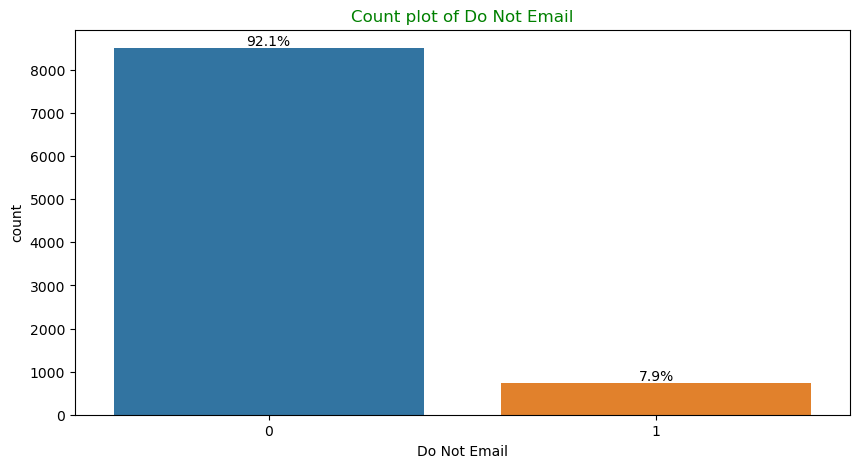

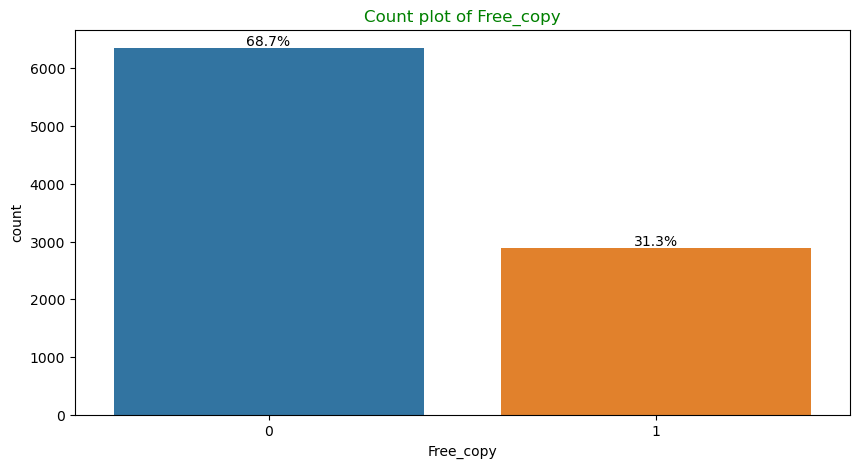

In [147]:
# countplot of columns with its value_counts percentage as annotation
for i in catcolsvar [:4]:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df)
    total=len(df[i])
    plt.xticks(rotation=0)
    
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
        

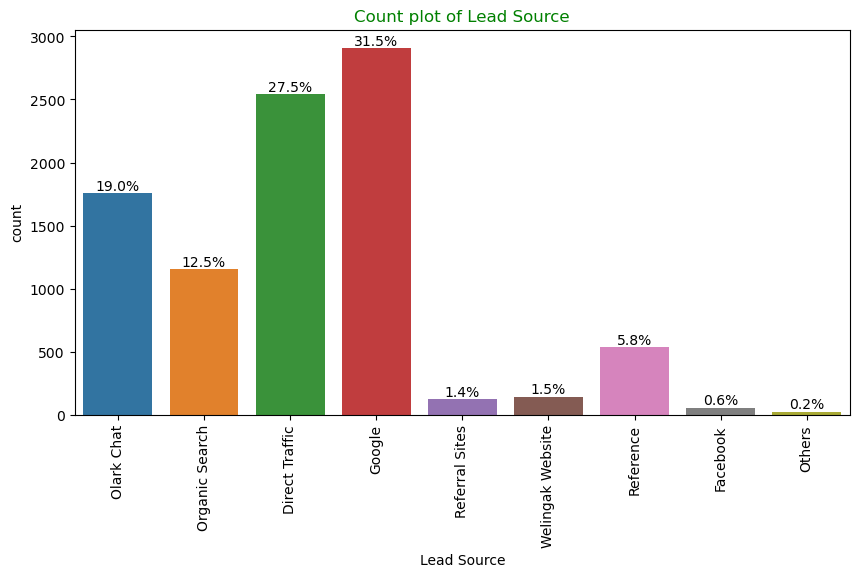

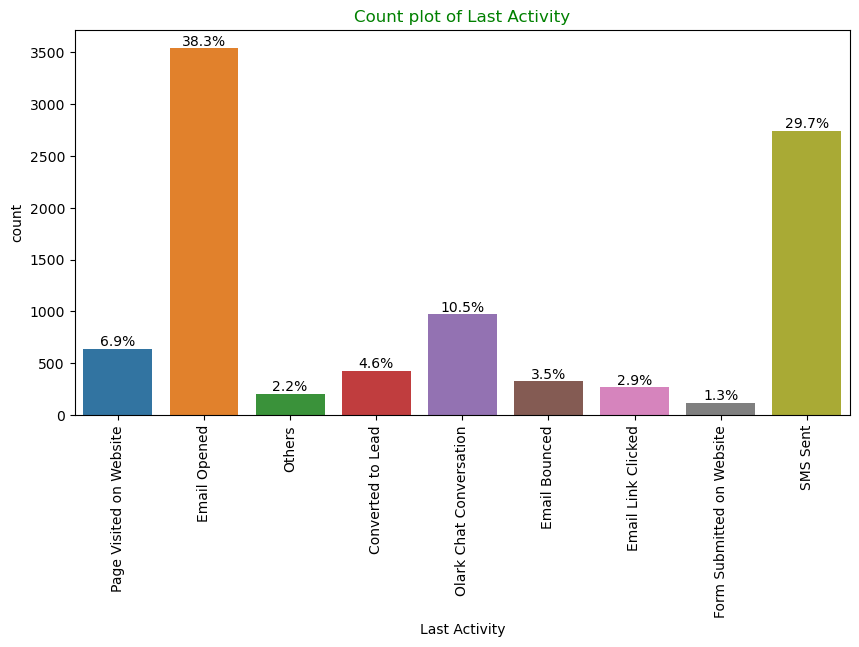

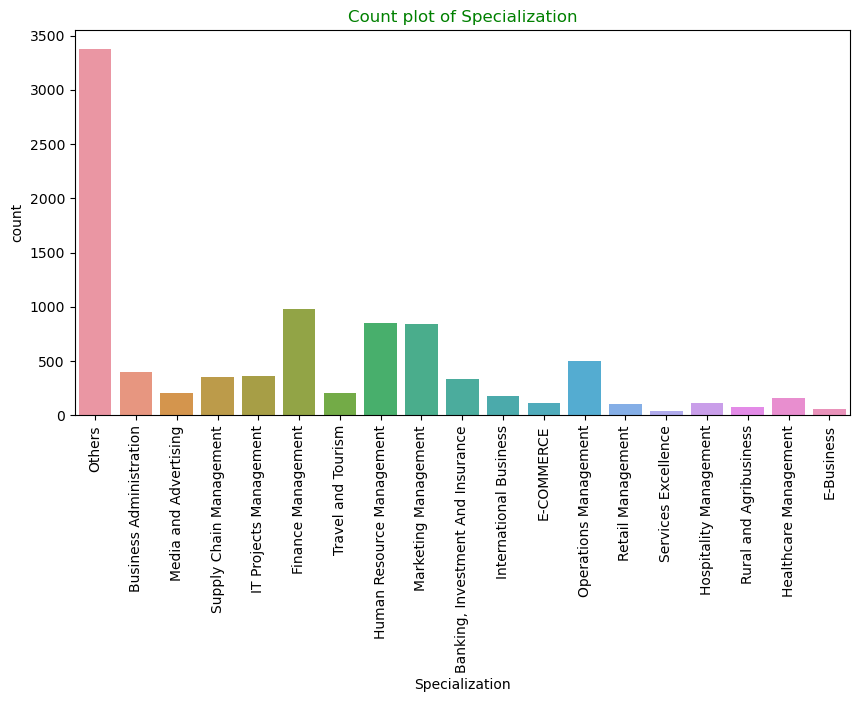

In [149]:
# Barplot for remaining columns from cat_cols (Did separate to rotate xticks 90* so labels doesnt become messy)
for i in catcolsvar[4:]:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df)
    total=len(df[i])
    plt.xticks(rotation=90)
    
    
    if i!="Specialization":        # (not doing for Specialization xtick labels will be messy)
        for p in ax.patches:
            text = '{:.1f}%'.format(100*p.get_height()/total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()

            ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    else:
        pass

## Inferences ## 

- During Categorical Univariate Analysis, we explore the percentage distribution of values within each variable, providing insights into the spread of values across columns.
- This analysis aids in identifying variables suitable for Bivariate analysis, offering insights into potential relationships between variables.

## Insights ##

**Compilation of features derived from variables predominantly represented (including non-converted cases)** 

1. **Lead Origin:**
 - "Landing Page Submission: 53%
 - "API": 39%

2. **Current_occupation:**
 - Unemployed: 90%

3. **Do Not Email:** 92%

4. **Lead Source: **
 - Google & Direct Traffic: 58%

5. **Last Activity:**
 - SMS sent and Email opened: 68%

### 4.3 Bivariate Analysis

#### Categorical Variables

In [67]:
# Function  for actual distribution with the raw data
# 2nd graph gives the conversion rate in percentage



In [150]:

def Bivariate_cat(df, variable_name, Target="Converted"):
    plt.figure(figsize=(20, 6))
    plt.suptitle("{} Distribution and Conversion Rates".format(variable_name), color="Brown", fontsize=18)
    
    # 1st plot
    plt.subplot(1, 2, 1)
    plt.title("Distribution of {}".format(variable_name), color="blue")
    ax = sns.countplot(x=variable_name, hue=Target, data=df, palette="prism_r", alpha=0.46)
    
    total = len(df[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No", "Yes"], title="Converted")
    
    # Annotation for 1st plot        
    for p in ax.patches:
        text = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(text, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    # 2nd plot
    plt.subplot(1, 2, 2)
    plt.title("Conversion Rate of {}".format(variable_name), color="green", fontsize=12)
    ax = sns.countplot(x=variable_name, hue=Target, data=df, palette="BuGn", alpha=0.85)
    
    # Modifications
    plt.xticks(rotation=90)
    plt.ylabel("Count", color='brown')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted", "Converted"], title="Lead Conversion Rate")
    
    # Annotation for 2nd plot
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')


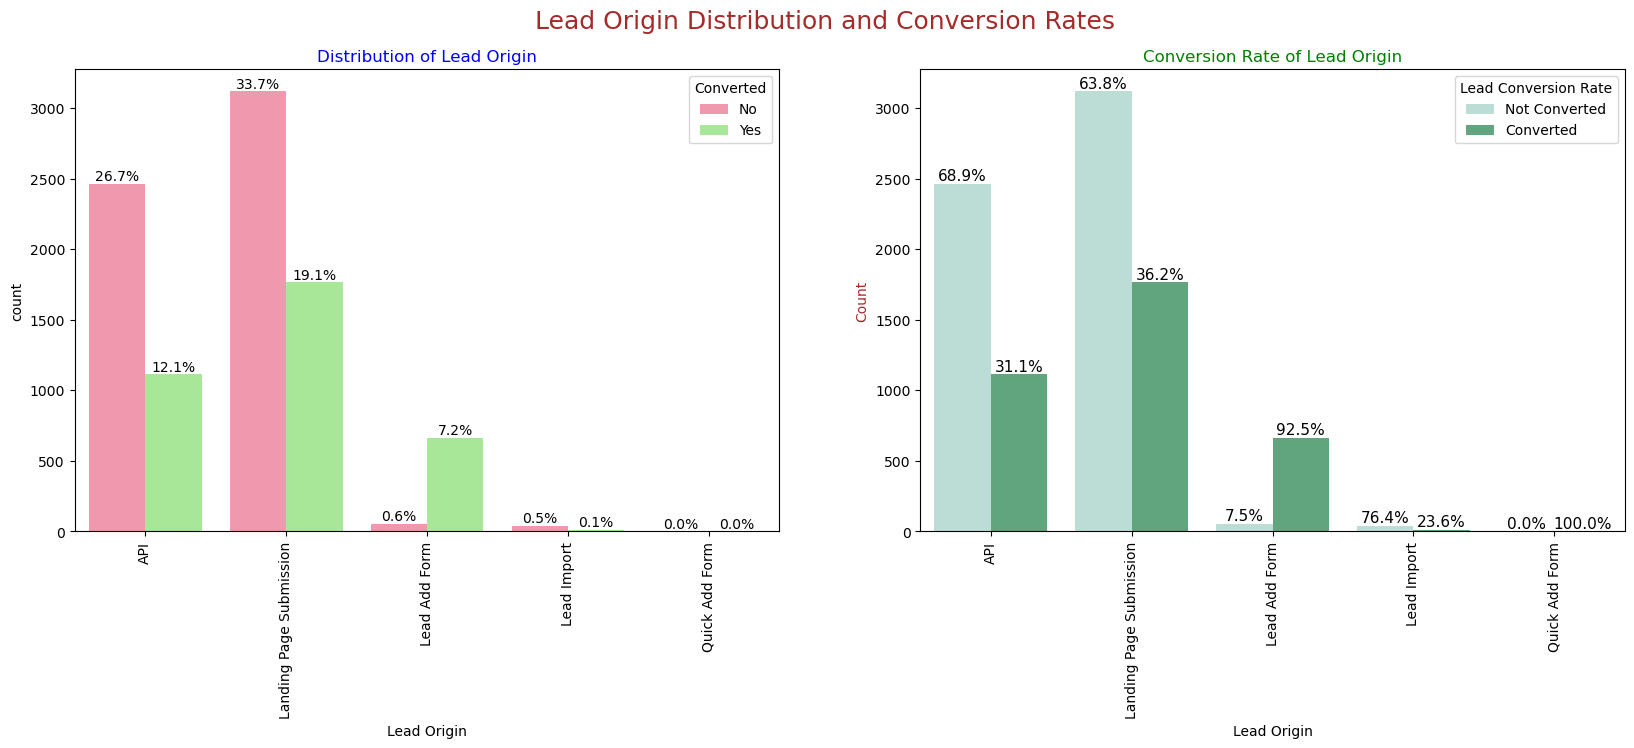

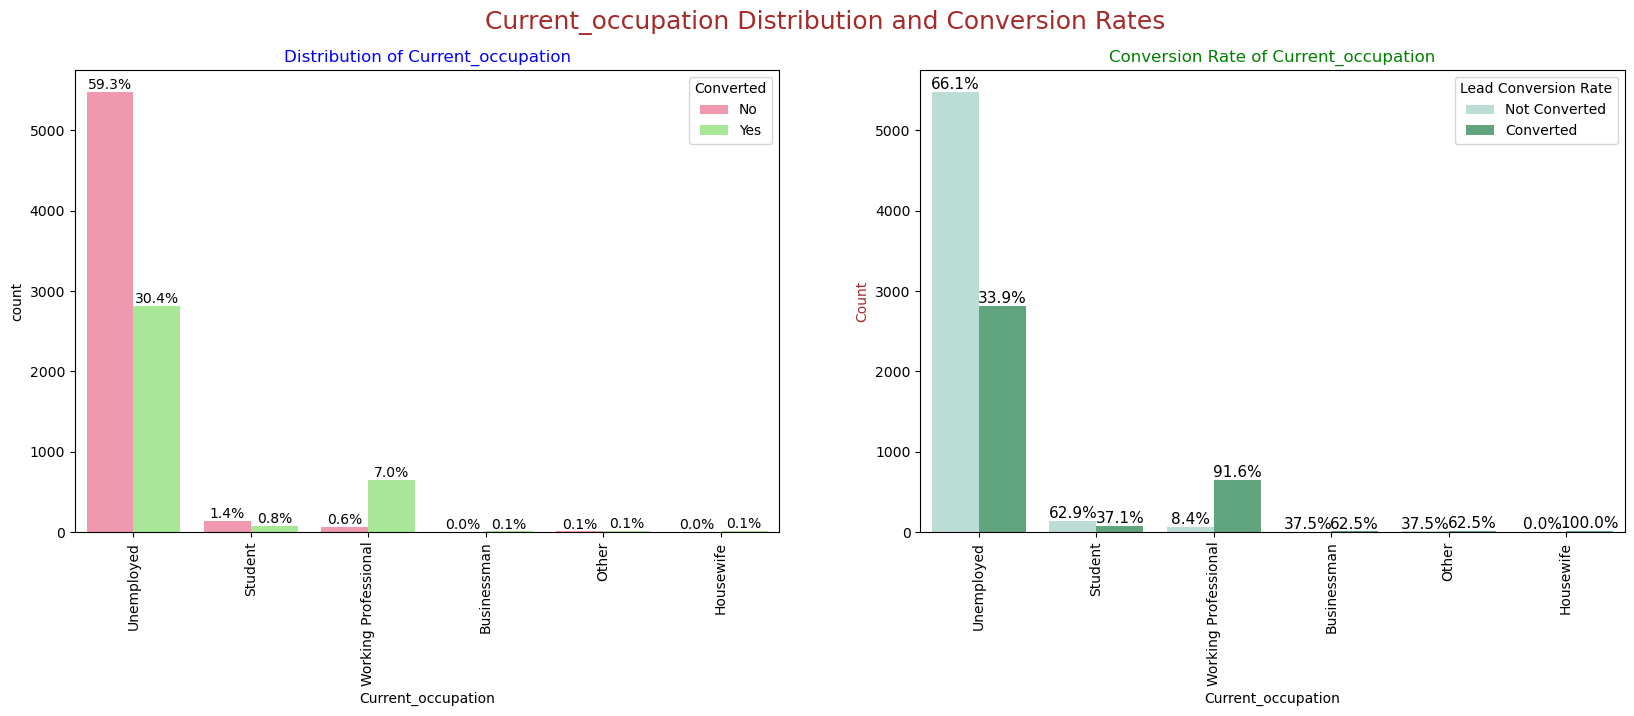

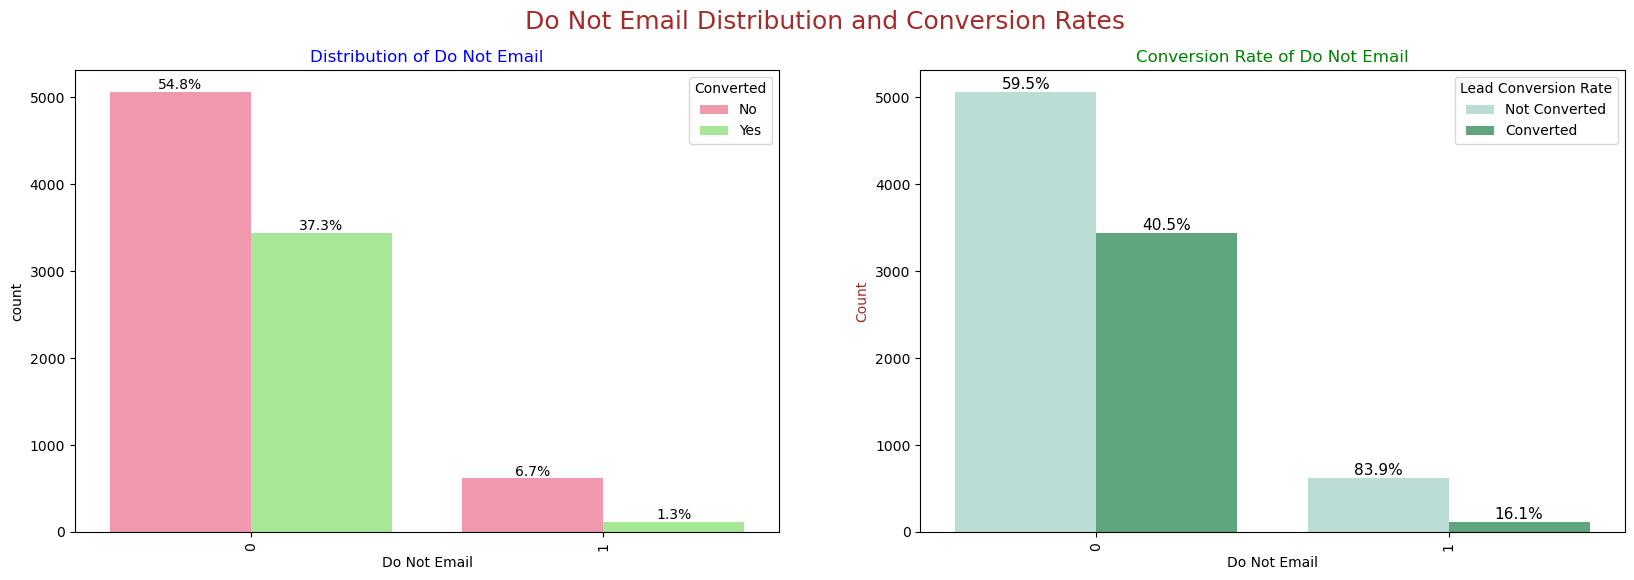

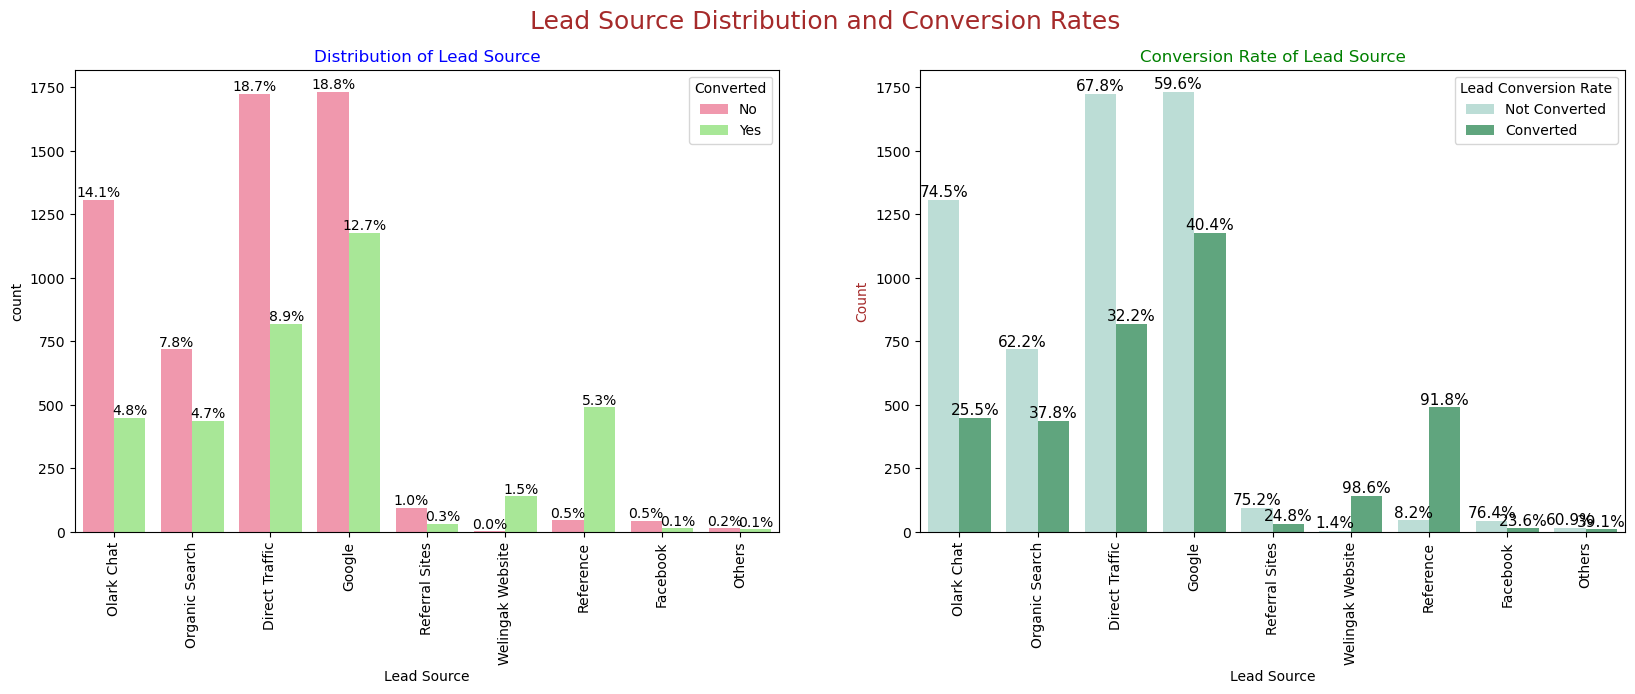

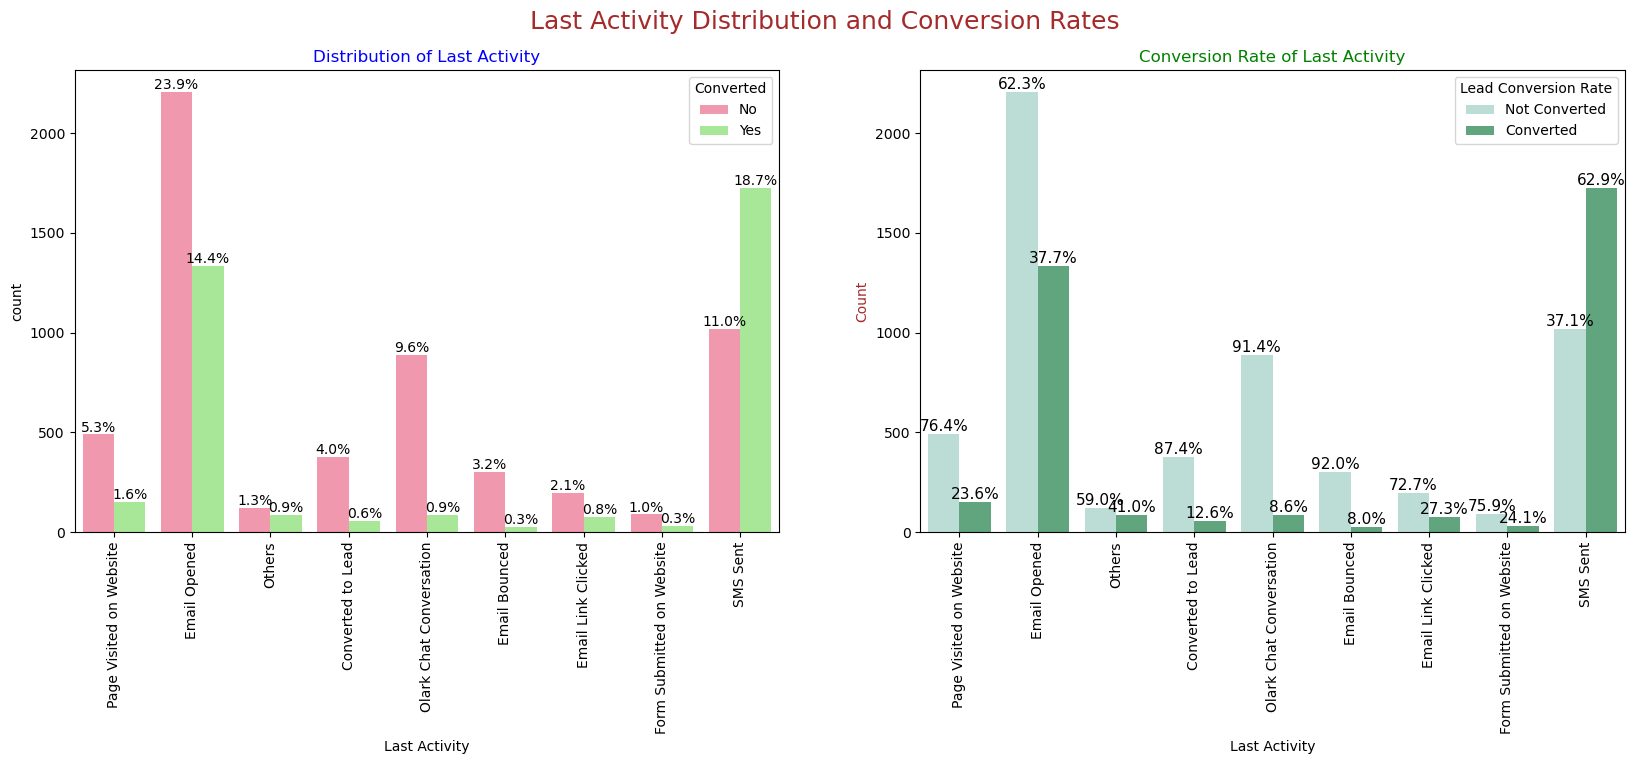

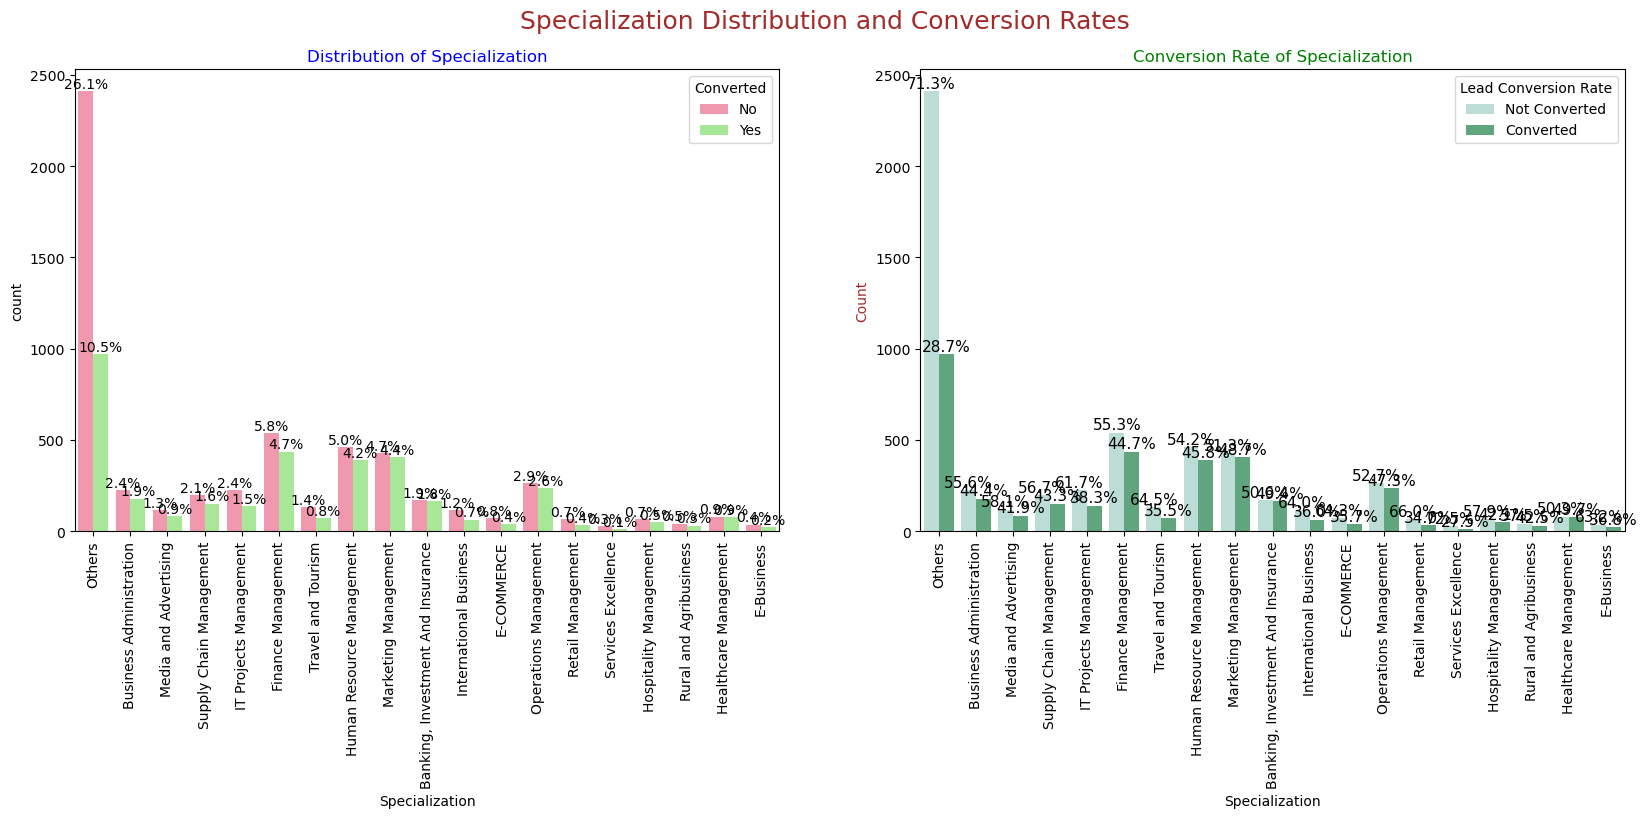

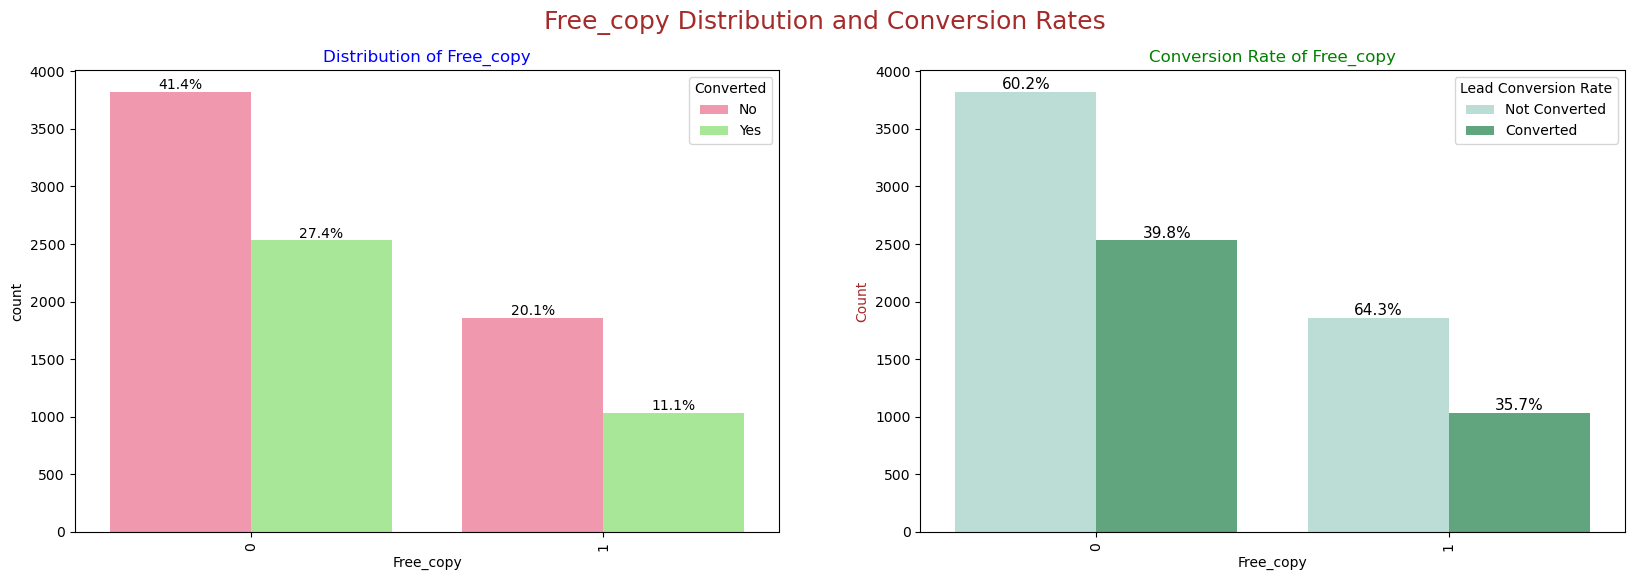

In [151]:
# Bivariate Analysis for all these variables using loop and UDF
catcols = ["Lead Origin","Current_occupation","Do Not Email",
            "Lead Source","Last Activity","Specialization","Free_copy"]

for i in catcols:
    Bivariate_cat(df,variable_name=i)
    

### Insights ###

- Lead Origin: Approximately 52% of all leads originated from "Landing Page Submission," boasting a lead conversion rate (LCR) of 36%. "API" identified roughly 39% of customers, with a lead conversion rate (LCR) of 31%.

- Current Occupation: The vast majority, around 90% of customers, are unemployed, with a lead conversion rate (LCR) of 34%. Conversely, Working Professionals contribute only 7.6% of total customers, yet exhibit an impressive lead conversion rate (LCR) of almost 92%.

- Do Not Email: A staggering 92% of individuals have opted out of receiving emails about the course.

- Lead Source: Google leads with an LCR of 40% out of 31% of customers, while Direct Traffic follows with a 32% LCR and 27% of customers, slightly lower than Google. Organic Search yields a 37.8% LCR, but the contribution from customers is only 12.5%. Reference boasts an exceptional LCR of 91%, although only approximately 6% of customers originate from this lead source.
- Last Activity: 'SMS Sent' exhibits a high lead conversion rate of 63%, with 30% contribution from last activities. 'Email Opened' activities contribute 38% of last activities performed by customers, with a lead conversion rate of 37%.

- Specialization: Marketing Management, HR Management, and Finance Management display significant contributions.



#### Bivariate Analysis for Numerical Variables

<Figure size 1600x400 with 0 Axes>

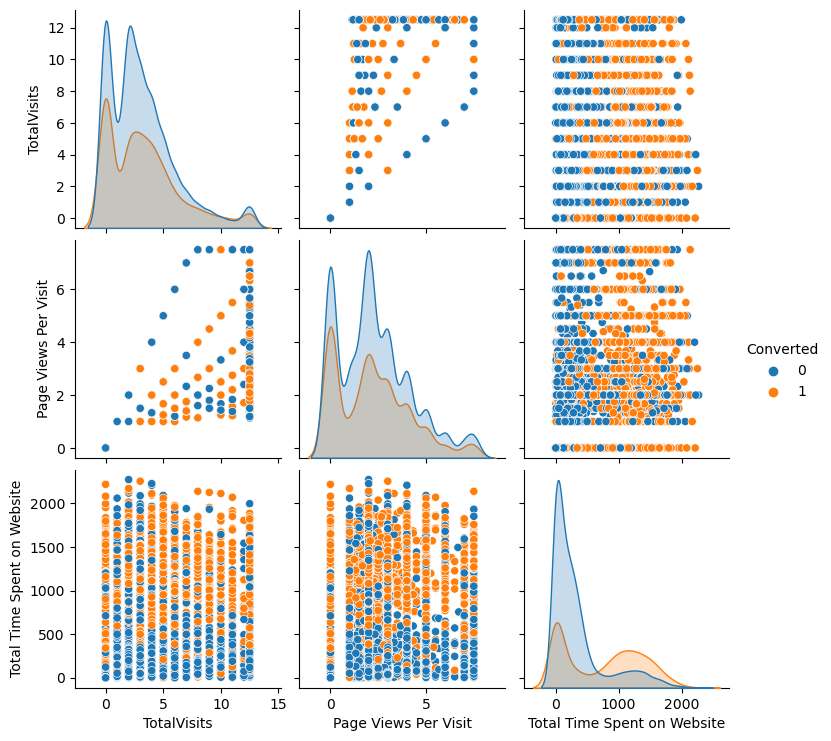

In [155]:
plt.figure(figsize=(16, 4))
sns.pairplot(data=df,vars=numcols,hue="Converted")                                  
plt.show()

In [157]:
num_columns =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

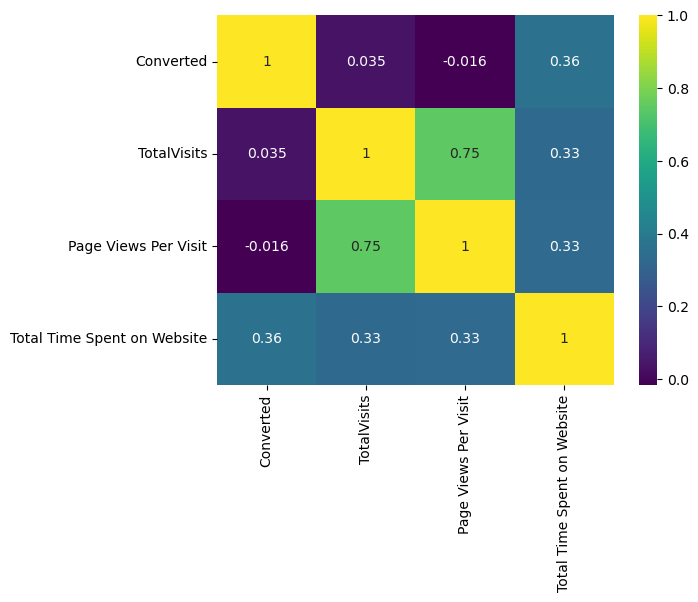

In [159]:
# Heatmap to show correlation between numerical variables
sns.heatmap(data=df[num_columns].corr(),cmap="viridis",annot=True)
plt.show()

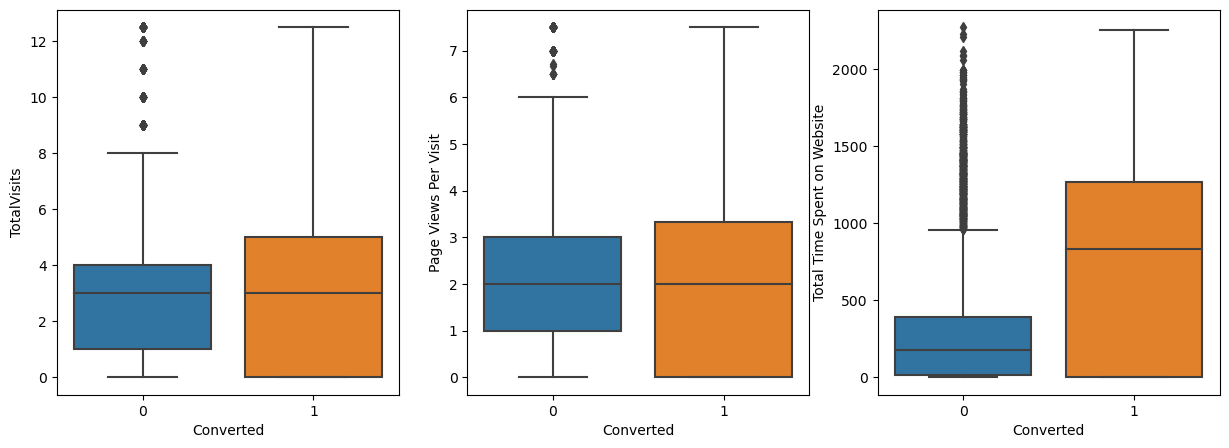

In [160]:
# Boxplot with Converted as hue

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)
plt.show()

### Inference ###
- In the boxplot, it is evident that past leads who spend more time on the website are more likely to be successfully converted compared to those who spend less time.

### Data Prepping ###

### 5.1 Dummy Variables

In [161]:
df.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current_occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

   Free_copy  
0          0  
1          0  
2          1  
3          0  
4          0

In [162]:

# Generating dummy variables for selected categorical features and excluding the initial ones.
dummy = pd.get_dummies(df[["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"]], drop_first=True)

# Incorporating the outcomes into the primary dataframe.
df = pd.concat([df, dummy], axis=1)

In [163]:
df.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current_occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

   Free_copy  Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0          0                                    0                          0   
1          0                                    0                          0   
2          1                                    1                          0   
3          0                                    1                          0   
4          0                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           0                     0   
3                        0                           0                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0           

In [164]:
#  drop the created dummy variables

df = df.drop(["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"],1)

In [165]:
df.shape

(9240, 49)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Free_copy                                 9240 non-null   int64  
 6   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 8   Lead Origin_Lead Import                   9240 non-null   uint8  
 9   Lead Origin_Quick Add Form                9240 non-null   uint8  
 10  Lead Source_Facebook                

## 6: Splitting Test-Train ###

In [167]:
# Putting predictor variables to X
X = df.drop('Converted', axis=1)

# Putting Target variables to y
y = df["Converted"]


In [168]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [169]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (6468, 48) 
y_train: (6468,)


In [170]:
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_test: (2772, 48) 
y_test: (2772,)


## 7: Standardizing feature scales. ##

In [171]:
# standard scaler, scaling the features
scaler = StandardScaler()

# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])


In [172]:
# X-train dataframe after standard scaling
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
1871     -0.291638    -1.064974                    -0.885371   
6795     -0.291638     0.262370                     0.005716   
3516     -0.291638     0.594206                    -0.691418   
8105     -0.291638     0.594206                     1.365219   
3934     -0.291638    -1.064974                    -0.885371   

      Page Views Per Visit  Free_copy  Lead Origin_Landing Page Submission  \
1871             -1.184892  -0.673169                                    0   
6795             -0.488713   1.485511                                    1   
3516              0.123715  -0.673169                                    0   
8105              1.432322  -0.673169                                    1   
3934             -1.184892  -0.673169                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
1871                          0                        0   
6795                          0                        0   
3516                          0                        0   
8105                          0                        0   
3934                          0                        0   

      Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  \
1871                           0                     0                   0   
6795                           0                     0                   0   
3516                           0                     0                   0   
8105                           0                     0                   1   
3934                           0                     0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
1871                       1                           0                   0   
6795                       0                           0                   0   
3516                       1                           0                   0   
8105                       0                           0                   0   
3934                       1                           0                   0   

      Lead Source_Reference  Lead Source_Referral Sites  \
1871                      0                           0   
6795                      0                           0   
3516                      0                           0   
8105                      0                           0   
3934                      0                           0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
1871                             0                            0   
6795                             0                            0   
3516                             0                            0   
8105                             0                            0   
3934                             0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
1871                                 0                           1   
6795                                 0                           1   
3516                                 0                           1   
8105                                 0                           0   
3934                                 0                           1   

      Last Activity_Form Submitted on Website  \
1871                                        0   
6795                                        0   
3516                                        0   
8105                                        0   
3934                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
1871                                      0                     0   
6795                                      0                     0   
3516                                      0                     0   
8105                                      0                     0   
3934                  

In [173]:
# Checking Lead Conversion Rate - The target variable
LeadCR = (sum(df['Converted'])/len(df['Converted'].index))*100
LeadCR

38.53896103896104

### Inference###
- Conversion Rate is 38.5%

### 7.1 : Checking Correlations

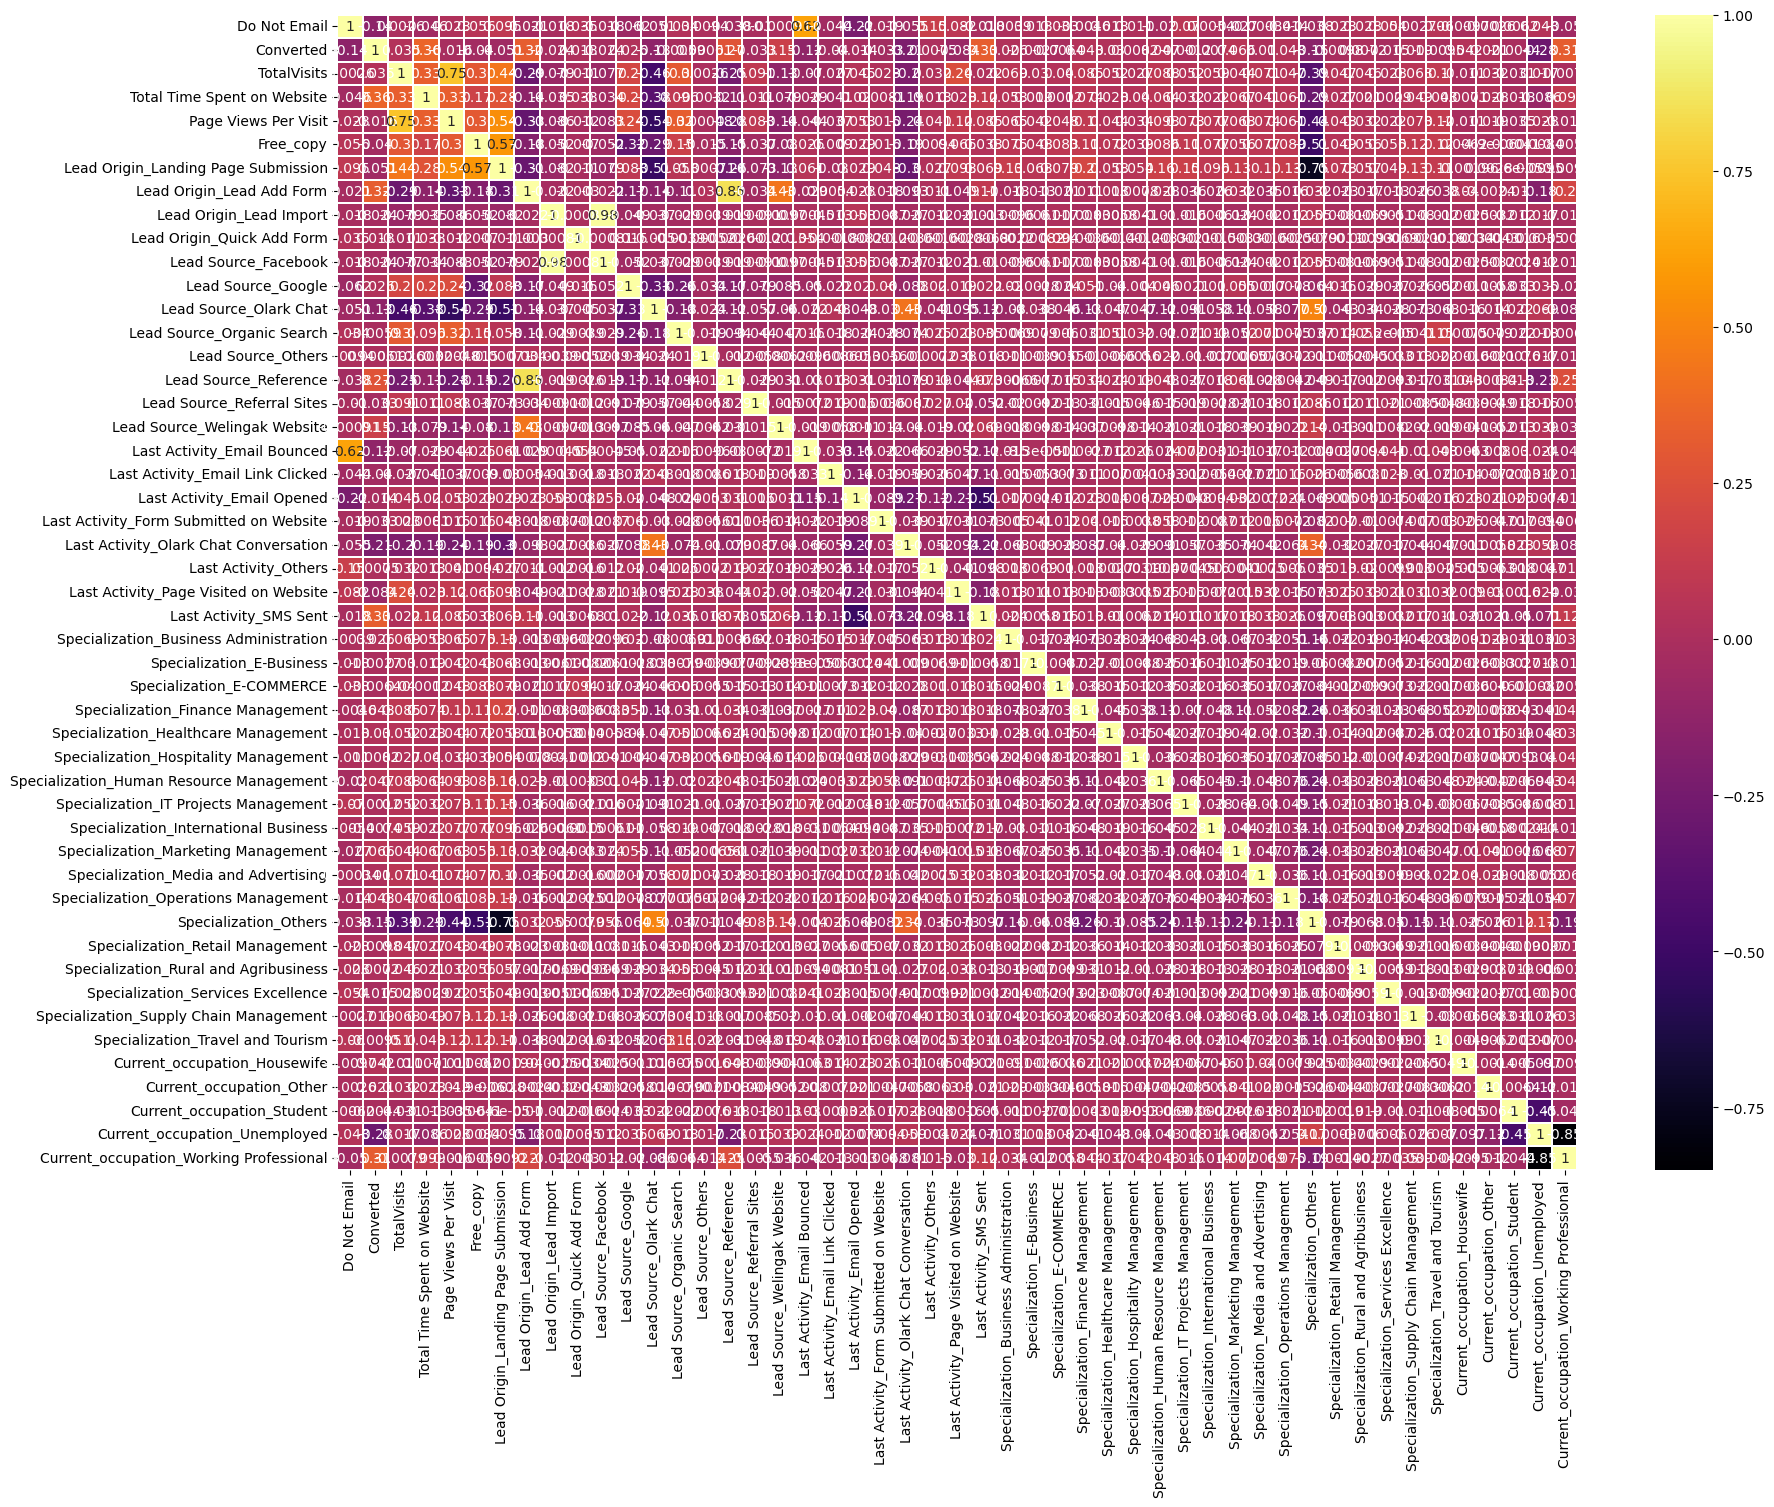

In [174]:
# analyzing the correlation matrix
plt.figure(figsize = (20,15))        
sns.heatmap(df.corr(),linewidths=0.01,cmap="inferno",annot=True)
plt.show()

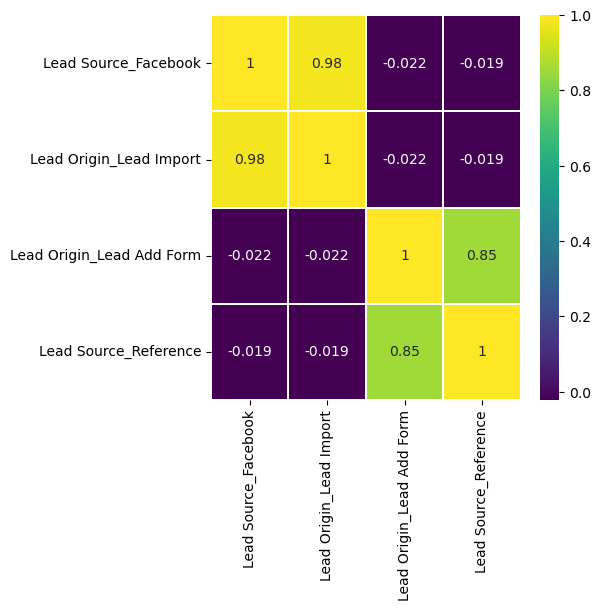

In [175]:
# The heatmap above displays numerous columns, making it challenging to interpret the information effectively. Consequently, we'll divide the suspected variables that potentially have high correlations with each other.
plt.figure(figsize = (5,5))        
sns.heatmap(df[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(),linewidths=0.01,cmap="viridis",annot=True)
plt.show()

## Inference ##
- The predictor variables mentioned above exhibit very high correlations with each other, with correlation coefficients near the diagonal reaching (0.98 and 0.85). It would be advisable to remove one variable from each pair, as they would not contribute significantly to the model. Therefore, we can opt to drop either `'Lead Origin_Lead Import'` or `'Lead Origin_Lead Add Form'`.

In [176]:
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

## 8: Model Building ##

### 8.1 Feature Selection Using Recursive Feature Elimination i.e.RFE ###

In [177]:
# Using RFE to reduce variables
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [178]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 11),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Free_copy', False, 18),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 19),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 24),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 14),
 ('Last Activity_Email Link Clicked', False, 6),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 29),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 

In [179]:
# Checknig the top 15 features chosen by RFE
top15=pd.DataFrame()
top15['features']=X_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking']=rfe.ranking_
top15.sort_values(by='Ranking')

features  Feature Chosen  Ranking
22                    Last Activity_SMS Sent            True        1
41              Current_occupation_Housewife            True        1
35                     Specialization_Others            True        1
28     Specialization_Hospitality Management            True        1
20                      Last Activity_Others            True        1
19     Last Activity_Olark Chat Conversation            True        1
17                Last Activity_Email Opened            True        1
14              Lead Source_Welingak Website            True        1
12                     Lead Source_Reference            True        1
11                        Lead Source_Others            True        1
45   Current_occupation_Working Professional            True        1
9                     Lead Source_Olark Chat            True        1
7                       Lead Source_Facebook            True        1
5        Lead Origin_Landing Page Submission            True        1
2                Total Time Spent on Website            True        1
44             Current_occupation_Unemployed           False        2
42                  Current_occupation_Other           False        3
43                Current_occupation_Student           False        4
37     Specialization_Rural and Agribusiness           False        5
16          Last Activity_Email Link Clicked           False        6
31     Specialization_International Business           False        7
36          Specialization_Retail Management           False        8
1                                TotalVisits           False        9
3                       Page Views Per Visit           False       10
0                               Do Not Email           False       11
21     Last Activity_Page Visited on Website           False       12
23    Specialization_Business Administration           False       13
15               Last Activity_Email Bounced           False       14
34      Specialization_Operations Management           False       15
29  Specialization_Human Resource Management           False       16
32       Specialization_Marketing Management           False       17
4                                  Free_copy           False       18
6                 Lead Origin_Quick Add Form           False       19
38        Specialization_Services Excellence           False       20
39    Specialization_Supply Chain Management           False       21
8                         Lead Source_Google           False       22
25                 Specialization_E-COMMERCE           False       23
13                Lead Source_Referral Sites           False       24
30     Specialization_IT Projects Management           False       25
27      Specialization_Healthcare Management           False       26
26         Specialization_Finance Management           False       27
10                Lead Source_Organic Search           False       28
18   Last Activity_Form Submitted on Website           False       29
33      Specialization_Media and Advertising           False       30
24                 Specialization_E-Business           False       31
40         Specialization_Travel and Tourism           False       32

In [180]:
# columns selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Current_occupation_Housewife',
       'Current_occupation_Working Professional'],
      dtype='object')

In [181]:
# columns not selected by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit', 'Free_copy',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
      

In [183]:
# User defined function for calculating VIFs for variables
def get_vif(model_df):
    Y = pd.DataFrame()
    Y['Features'] = model_df.columns
    Y['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    Y['VIF'] = round(Y['VIF'], 2)
    Y = Y.sort_values(by='VIF', ascending=False)
    Y = Y.reset_index(drop=True)
    return Y

### Model 1

In [184]:
# Building a model using statsmodels

# Selecting columns for this model 
rfe_col=X_train.columns[rfe.support_]

# Creating X_train dataframe with those variables
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()  

logm1.params

const                                      -1.033284
Total Time Spent on Website                 1.050544
Lead Origin_Landing Page Submission        -1.272090
Lead Source_Facebook                       -0.696059
Lead Source_Olark Chat                      0.900083
Lead Source_Others                          0.980708
Lead Source_Reference                       2.897685
Lead Source_Welingak Website                5.380227
Last Activity_Email Opened                  0.950623
Last Activity_Olark Chat Conversation      -0.553411
Last Activity_Others                        1.258012
Last Activity_SMS Sent                      2.068763
Specialization_Hospitality Management      -1.072037
Specialization_Others                      -1.193681
Current_occupation_Housewife               23.022209
Current_occupation_Working Professional     2.685466
dtype: float64

In [185]:
print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.8
Date:                Fri, 19 Apr 2024   Deviance:                       5465.5
Time:                        11:59:06   Pearson chi2:                 8.09e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3839
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

- The column "Current_occupation_Housewife" will be excluded from the model because it exhibits a high p-value of 0.999, surpassing the accepted threshold of 0.05 for statistical significance.

### Model 2

In [186]:
# Dropping 'Current_occupation_Housewife' column
rfe_col=rfe_col.drop("Current_occupation_Housewife")

In [187]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()  

logm2.params

const                                     -1.025075
Total Time Spent on Website                1.049364
Lead Origin_Landing Page Submission       -1.267369
Lead Source_Facebook                      -0.696913
Lead Source_Olark Chat                     0.899051
Lead Source_Others                         0.973897
Lead Source_Reference                      2.917123
Lead Source_Welingak Website               5.379144
Last Activity_Email Opened                 0.949036
Last Activity_Olark Chat Conversation     -0.558345
Last Activity_Others                       1.248172
Last Activity_SMS Sent                     2.058828
Specialization_Hospitality Management     -1.079528
Specialization_Others                     -1.197801
Current_occupation_Working Professional    2.677350
dtype: float64

In [188]:
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2740.3
Date:                Fri, 19 Apr 2024   Deviance:                       5480.7
Time:                        12:00:06   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3825
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

- The column "Lead Source_Facebook" will be eliminated from the model because it demonstrates a high p-value of 0.187, exceeding the accepted threshold of 0.05 for statistical significance.

### Model 3

In [189]:
# Dropping 'Lead Source_Facebook' column
rfe_col=rfe_col.drop("Lead Source_Facebook")

In [190]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()  

logm3.params

const                                     -1.040542
Total Time Spent on Website                1.051824
Lead Origin_Landing Page Submission       -1.249311
Lead Source_Olark Chat                     0.916940
Lead Source_Others                         0.981395
Lead Source_Reference                      2.937179
Lead Source_Welingak Website               5.396676
Last Activity_Email Opened                 0.943420
Last Activity_Olark Chat Conversation     -0.558250
Last Activity_Others                       1.248700
Last Activity_SMS Sent                     2.055550
Specialization_Hospitality Management     -1.090368
Specialization_Others                     -1.194330
Current_occupation_Working Professional    2.675678
dtype: float64

In [191]:
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.3
Date:                Fri, 19 Apr 2024   Deviance:                       5482.6
Time:                        12:01:10   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3823
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

- The column "Lead Source_Others" will be excluded from the model as it exhibits a high p-value of 0.055, surpassing the accepted threshold of 0.05 for statistical significance.

### Model 4

In [192]:
# Dropping 'Lead Source_Facebook' column
rfe_col=rfe_col.drop("Lead Source_Others")

In [193]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm4 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm4 = sm.GLM(y_train,X_train_sm4,family = sm.families.Binomial()).fit()  

logm4.params

const                                     -1.023594
Total Time Spent on Website                1.049789
Lead Origin_Landing Page Submission       -1.258954
Lead Source_Olark Chat                     0.907184
Lead Source_Reference                      2.925326
Lead Source_Welingak Website               5.388662
Last Activity_Email Opened                 0.942099
Last Activity_Olark Chat Conversation     -0.555605
Last Activity_Others                       1.253061
Last Activity_SMS Sent                     2.051879
Specialization_Hospitality Management     -1.094445
Specialization_Others                     -1.203333
Current_occupation_Working Professional    2.669665
dtype: float64

In [194]:
print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.1
Date:                Fri, 19 Apr 2024   Deviance:                       5486.1
Time:                        12:01:56   Pearson chi2:                 8.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3819
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

- Model 4 demonstrates stability and exhibits significant p-values within the threshold (p-values < 0.05). Therefore, we will proceed with using it for further analysis.

In [195]:
# Checking VIFs for all variables in the Model 4 
get_vif(X_train_rfe)

Features   VIF
0                     Specialization_Others  2.47
1       Lead Origin_Landing Page Submission  2.45
2                Last Activity_Email Opened  2.36
3                    Last Activity_SMS Sent  2.20
4                    Lead Source_Olark Chat  2.14
5     Last Activity_Olark Chat Conversation  1.72
6                     Lead Source_Reference  1.31
7               Total Time Spent on Website  1.24
8   Current_occupation_Working Professional  1.21
9              Lead Source_Welingak Website  1.08
10                     Last Activity_Others  1.08
11    Specialization_Hospitality Management  1.02

- No variable requires elimination since all possess favorable VIF values below 5.

## Inference ##

- All variables in this model have p-values below 0.05, indicating statistical significance. Additionally, the VIF values are satisfactory, suggesting no issues with multicollinearity. As a result, Model 4 will be chosen for further evaluation.

## 9: Model Evaluation ##

In [196]:
# Getting the predicted values on the train set
y_train_pred = logm4.predict(X_train_sm4)           # giving prob. of getting 1

y_train_pred[:10]

1871    0.474082
6795    0.073252
3516    0.249087
8105    0.768973
3934    0.212973
4844    0.987807
3297    0.108454
8071    0.996128
987     0.169259
7423    0.869641
dtype: float64

In [197]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.47408215, 0.07325161, 0.24908697, 0.7689732 , 0.2129729 ,
       0.9878074 , 0.1084541 , 0.99612765, 0.16925902, 0.86964073])

In [198]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID
0          0        0.474082         1871
1          0        0.073252         6795
2          0        0.249087         3516
3          0        0.768973         8105
4          0        0.212973         3934

We have to find the optimal cutoff Threshold value of Probability.

In [199]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted
0          0        0.474082         1871          0
1          0        0.073252         6795          0
2          0        0.249087         3516          0
3          0        0.768973         8105          1
4          0        0.212973         3934          0

### 9.1 Confusion Matrix

In [200]:
# Confusion matrix  (Actual / predicted)

confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3588  414]
 [ 846 1620]]


In [201]:
# Predicted        not_converted  |  converted
# Actual                          |
# -----------------------------------------------------
# not_converted        3588       |   414
# converted            846        |   1620  


# Above is the confusion matrix when we use threshold of probability as 0.5

### 9.2 Accuracy

In [202]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.8051948051948052


### 9.3 Performance measures beyond accuracy ###


In [203]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [204]:
# Sensitivity of the logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.656934306569343


In [205]:
# Calculating the specificity
print("Specificity :",TN / float(TN+FP))


Specificity : 0.896551724137931


In [206]:
# Calculating false postive conversion rate
print(FP/ float(TN+FP))

0.10344827586206896


In [207]:
# positive predictive value 
print (TP / float(TP+FP))

0.7964601769911505


In [119]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8092016238159675


### 9.4 Plotting the ROC Curve

In [208]:
# Function to draw ROC curve 
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None


In [209]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

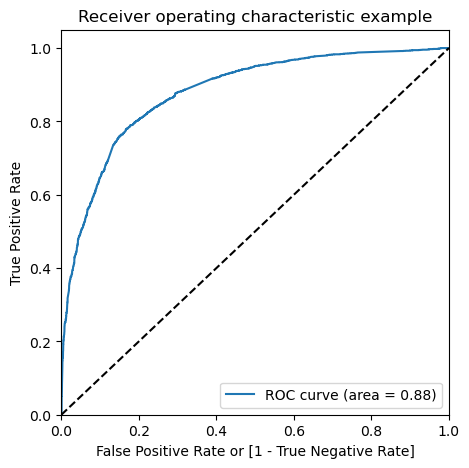

In [210]:
# Drawing ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

- The area under the ROC curve is 0.88 out of 1, indicating the effectiveness of the predictive model.

### Finding Optimal Cutoff Point/ Probability ###


In [211]:
# Creating columns with different probability cutoffs 
numb = [float(x)/10 for x in range(10)]
for i in numb:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.474082         1871          0    1    1    1    1    1   
1          0        0.073252         6795          0    1    0    0    0    0   
2          0        0.249087         3516          0    1    1    1    0    0   
3          0        0.768973         8105          1    1    1    1    1    1   
4          0        0.212973         3934          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    0    0  
4    0    0    0    0    0

In [212]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
nums = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in nums:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.595702  0.973642  0.362819
0.2   0.2  0.721243  0.920114  0.598701
0.3   0.3  0.791280  0.832928  0.765617
0.4   0.4  0.813698  0.763585  0.844578
0.5   0.5  0.805195  0.656934  0.896552
0.6   0.6  0.792981  0.585969  0.920540
0.7   0.7  0.779066  0.507705  0.946277
0.8   0.8  0.754020  0.405515  0.968766
0.9   0.9  0.707792  0.247364  0.991504


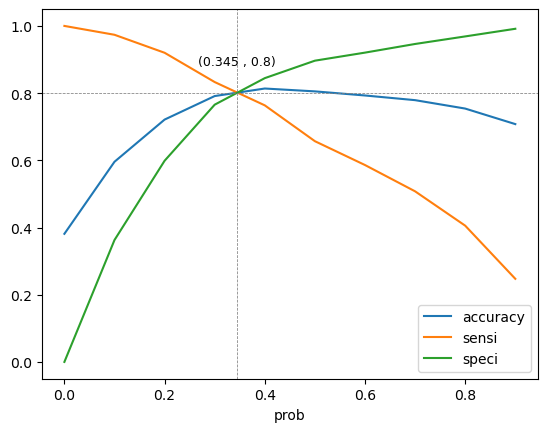

In [213]:
# Plotting accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Finding the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculating the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolating the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plotting the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()


## Inference ## 
- The approximate point where all the curves intersect is 0.345, making it our optimal cutoff point for the probability threshold.

#### Mapping again using optimal cutoff point 

In [214]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.345 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted
0          0        0.474082         1871                1
1          0        0.073252         6795                0
2          0        0.249087         3516                0
3          0        0.768973         8105                1
4          0        0.212973         3934                0

### 9.5 Calculating all metrics using confusion matrix for Train

In [215]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

0.8045763760049475


In [216]:
# UDF for all Logistic Regression Metrics
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculating false postive conversion rate
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))
    
    

In [217]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("- -"*10,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("- -"*10,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("- - "*10,"\n")

- -- -- -- -- -- -- -- -- -- - 

Confusion Matrix
[[3230  772]
 [ 492 1974]] 

- -- -- -- -- -- -- -- -- -- - 

True Negative                    :  3230
True Positive                    :  1974
False Negative                   :  492
False Positve                    :  772
Model Accuracy                   :  0.8046
Model Sensitivity                :  0.8005
Model Specificity                :  0.8071
Model Precision                  :  0.7189
Model Recall                     :  0.8005
Model True Positive Rate (TPR)   :  0.8005
Model False Positive Rate (FPR)  :  0.1929


- - - - - - - - - - - - - - - - - - - -  



### 9.6 Precision and recall tradeoff

In [218]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

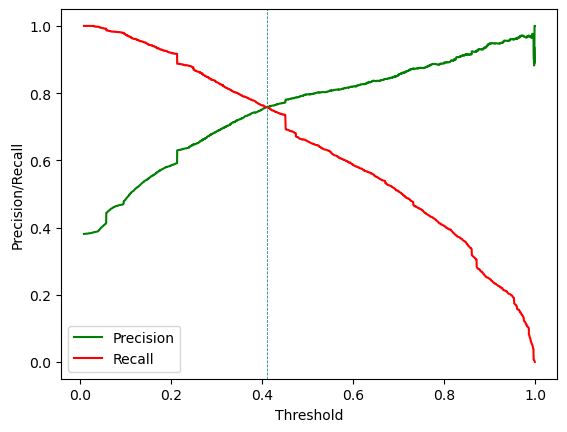

In [219]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# adding legend and axis labels

plt.axvline(x=0.41, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

- The point where the curve intersects represents the threshold value where the model strikes a balance between precision and recall. In this case, our probability threshold is approximately 0.41 based on the curve above.

In [220]:
# copying df to test model evaluation with precision recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy()

In [221]:
# assigning a feature for 0.41 cutoff from precision recall curve for comparison (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head()

Converted  Converted_Prob  Prospect ID  final_predicted  \
0          0        0.474082         1871                1   
1          0        0.073252         6795                0   
2          0        0.249087         3516                0   
3          0        0.768973         8105                1   
4          0        0.212973         3934                0   

   precision_recall_prediction  
0                            1  
1                            0  
2                            0  
3                            1  
4                            0

In [222]:
# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("- -"*10,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("- -"*10,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("- -"*10,"\n")


- -- -- -- -- -- -- -- -- -- - 

Confusion Matrix
[[3406  596]
 [ 596 1870]] 

- -- -- -- -- -- -- -- -- -- - 

True Negative                    :  3406
True Positive                    :  1870
False Negative                   :  596
False Positve                    :  596
Model Accuracy                   :  0.8157
Model Sensitivity                :  0.7583
Model Specificity                :  0.8511
Model Precision                  :  0.7583
Model Recall                     :  0.7583
Model True Positive Rate (TPR)   :  0.7583
Model False Positive Rate (FPR)  :  0.1489


- -- -- -- -- -- -- -- -- -- - 



## Inference ##

- As indicated by the aforementioned metrics, when employing a precision-recall threshold cutoff of 0.41, the True Positive Rate, Sensitivity, and Recall values have decreased to 75%, which falls short of the business requirement of 80%.


### <strong> Adding "Lead Score" Feature to Training dataframe</strong>

- A higher score implies that the lead is hot, indicating a higher likelihood of conversion.
- Conversely, a lower score suggests that the lead is cold and is less likely to convert.

In [223]:
# Adding the Lead Score
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score
0          0        0.474082         1871                1          47
1          0        0.073252         6795                0           7
2          0        0.249087         3516                0          25
3          0        0.768973         8105                1          77
4          0        0.212973         3934                0          21

## 10: Making Predictions on test set ##

### 10.1 Scaling Test dataset

In [224]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 46 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              2772 non-null   int64  
 1   TotalVisits                               2772 non-null   float64
 2   Total Time Spent on Website               2772 non-null   int64  
 3   Page Views Per Visit                      2772 non-null   float64
 4   Free_copy                                 2772 non-null   int64  
 5   Lead Origin_Landing Page Submission       2772 non-null   uint8  
 6   Lead Origin_Quick Add Form                2772 non-null   uint8  
 7   Lead Source_Facebook                      2772 non-null   uint8  
 8   Lead Source_Google                        2772 non-null   uint8  
 9   Lead Source_Olark Chat                    2772 non-null   uint8  
 10  Lead Source_Organic Search       

In [225]:
# fetching int64 and float64 dtype columns from dataframe for scaling
numcols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[numcols] = scaler.transform(X_test[numcols])

X_test = X_test[rfe_col]
X_test.head()

Total Time Spent on Website  Lead Origin_Landing Page Submission  \
4269                     0.964504                                    0   
2376                    -0.885371                                    0   
7766                    -0.777416                                    0   
9199                    -0.885371                                    0   
4359                    -0.885371                                    0   

      Lead Source_Olark Chat  Lead Source_Reference  \
4269                       0                      0   
2376                       0                      1   
7766                       0                      0   
9199                       1                      0   
4359                       0                      1   

      Lead Source_Welingak Website  Last Activity_Email Opened  \
4269                             0                           0   
2376                             0                           0   
7766                             0                           0   
9199                             0                           0   
4359                             0                           1   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
4269                                      0                     0   
2376                                      0                     0   
7766                                      0                     1   
9199                                      1                     0   
4359                                      0                     0   

      Last Activity_SMS Sent  Specialization_Hospitality Management  \
4269                       1                                      0   
2376                       1                                      0   
7766                       0                                      0   
9199                       0                                      0   
4359                       0                                      0   

      Specialization_Others  Current_occupation_Working Professional  
4269                      1                                        0  
2376                      1                                        0  
7766                      0                                        1  
9199                      1                                        0  
4359                      0                                        0

### 10.2 Prediction on Test Dataset using final model 

In [226]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 13)

In [227]:
# making prediction using final model  i.e. model 4
y_test_pred = logm4.predict(X_test_sm)

In [228]:
# top 10 columns
y_test_pred[:10]

4269    0.697934
2376    0.860665
7766    0.889241
9199    0.057065
4359    0.871510
9186    0.503859
1631    0.419681
8963    0.154531
8007    0.072344
5324    0.298849
dtype: float64

In [229]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

0
4269  0.697934
2376  0.860665
7766  0.889241
9199  0.057065
4359  0.871510

In [230]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Converted
4269          1
2376          1
7766          1
9199          0
4359          1

In [231]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

Converted  Prospect ID         0
0          1         4269  0.697934
1          1         2376  0.860665
2          1         7766  0.889241
3          0         9199  0.057065
4          1         4359  0.871510

In [232]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         4269          1        0.697934
1         2376          1        0.860665
2         7766          1        0.889241
3         9199          0        0.057065
4         4359          1        0.871510

In [233]:
# taking sensitivity-specificity method at 0.345 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted
0         4269          1        0.697934                1
1         2376          1        0.860665                1
2         7766          1        0.889241                1
3         9199          0        0.057065                0
4         4359          1        0.871510                1

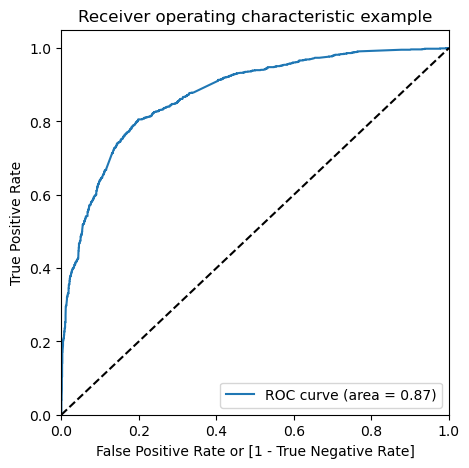

In [234]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

## Inference ## 

- An area under the ROC curve of 0.87 out of 1 suggests a well-performing predictive model.

### 10.3 Test set Model Evaluation ###

In [235]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("- - "*10,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("- -"*10,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("- -"*10,"\n")

- - - - - - - - - - - - - - - - - - - -  

Confusion Matrix
[[1353  324]
 [ 221  874]] 

- -- -- -- -- -- -- -- -- -- - 

True Negative                    :  1353
True Positive                    :  874
False Negative                   :  221
False Positve                    :  324
Model Accuracy                   :  0.8034
Model Sensitivity                :  0.7982
Model Specificity                :  0.8068
Model Precision                  :  0.7295
Model Recall                     :  0.7982
Model True Positive Rate (TPR)   :  0.7982
Model False Positive Rate (FPR)  :  0.1932


- -- -- -- -- -- -- -- -- -- - 



## Inference ##
- The evaluation matrics are pretty close to each other, indicating that the model is performing consistently across different evaluation metrics in both test and train dataset.


For the Test set:

- Accuracy stands at 80.34%.
- Sensitivity is approximately 79.82%, rounded to 80%.
- Specificity is 80.68%.

In [236]:
# features and their coefficicent from final model
parameters=logm4.params.sort_values(ascending=False)
parameters

Lead Source_Welingak Website               5.388662
Lead Source_Reference                      2.925326
Current_occupation_Working Professional    2.669665
Last Activity_SMS Sent                     2.051879
Last Activity_Others                       1.253061
Total Time Spent on Website                1.049789
Last Activity_Email Opened                 0.942099
Lead Source_Olark Chat                     0.907184
Last Activity_Olark Chat Conversation     -0.555605
const                                     -1.023594
Specialization_Hospitality Management     -1.094445
Specialization_Others                     -1.203333
Lead Origin_Landing Page Submission       -1.258954
dtype: float64

## Insights ##
- A high positive coefficient signifies that a variable has a greater impact on predicting the probability of leads converting to enroll in X-Education's course.

## Adding "Lead Score" Feature to Test dataframe

- A higher score indicates that the lead is hot, implying a higher probability of conversion.
- Conversely, a lower score suggests that the lead is cold and is less likely to convert.

In [237]:
# Adding the Lead Score 

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted  Lead_Score
0         4269          1        0.697934                1          70
1         2376          1        0.860665                1          86
2         7766          1        0.889241                1          89
3         9199          0        0.057065                0           6
4         4359          1        0.871510                1          87

<hr/>

## Conclusions ##

## Train - Test
### **Train Data Set:**            

- **Accuracy:** 80.46%
- **Sensitivity:** 80.05%
- **Specificity:** 80.71%

### **Test Data Set:** 

- **Accuracy:** 80.34%
- **Sensitivity:** 79.82% (approximately 80%)
- **Specificity:** 80.68%

- Utilizing a cut-off value of 0.345, the model attained a sensitivity of 80.05% in the training set and 79.82% in the test set.
- Sensitivity here denotes the model's accuracy per customer.
- Additionally, the model yielded an accuracy of 80.46%, aligning well with the study's objectives.
<hr/>

<strong><span style="color:red">Note:</span></strong> The optimal cutoff probability point is 0.345. Leads with a probability greater than 0.345 will be predicted as converted (hot leads), while those with a probability smaller than 0.345 will be predicted as not converted (cold leads).
<hr/>



## Suggestions ##

To enhance Lead Conversion Rates:

1. Allocate more resources towards advertising on the Welingak website.
2. Establish a referral program for existing customers, offering incentives for successful referrals.
3. Tailor the product to better meet the needs of working professionals, engaging them through personalized messaging.
4. Enhance communication channels such as SMS and email for more effective outreach.
5. Improve website engagement by optimizing the user interface and experience.
6. Utilize email marketing strategies to engage potential leads.
7. To pinpoint areas for improvement:
   - Refine content for specialization programs with lower conversion rates.
   - Use Olark Chat as an initial touchpoint, then transition to SMS or WhatsApp for ongoing communication to maintain brand visibility and engagement.


